In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import cftime
import datetime
from datetime import date
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
from mpl_toolkits.mplot3d import Axes3D
import netCDF4
import numpy
import os
import pandas
from PIL import Image
import random
import readline
import scipy
from scipy import fft
from scipy import linalg
from scipy import stats
from scipy.stats import poisson, ttest_ind
import seaborn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import normalize
from statsmodels.tsa.ar_model import AutoReg
import xarray as xr

In [2]:
Diri = '/glade/u/home/whimkao//ExtraTrack/Output_Files/'

In [3]:
# Open File
def Open_File(File):
    DF = pandas.read_csv(File)
    DF = DF.drop("Unnamed: 0", axis=1)
    return (DF)

In [4]:
# Open Each File
def Files_Open(Model, Diri):
    Data_DF = Open_File(Diri+Model+'_Data_Output_V3.csv')
    ET_DF = Open_File(Diri+Model+'_ET_Output_V3.csv')
    Codes_DF = Open_File(Diri+Model+'_Codes_Output_V3.csv')
    Storms_DF = Open_File(Diri+Model+'_Storms_Output_V3.csv')
    Time = []
    Start_Time = []
    End_Time = []
    for i in range(len(Data_DF)):
        Time.append(Datetime(Data_DF["Time(Z)"][i]))
    for j in range(len(ET_DF)):
        Start_Time.append(Datetime(ET_DF["Start Time"][j]))
        End_Time.append(Datetime(ET_DF["End Time"][j]))
    Start_Time_All = []
    End_Time_All = []
    for k in range(len(Storms_DF)):
        Start_Time_All.append(Datetime(Storms_DF["Start Time"][k]))
        if type(Storms_DF["End Time"][k]) == str:
            End_Time_All.append(Datetime(Storms_DF["End Time"][k]))
        else:
            End_Time_All.append(numpy.nan)
    Data_DF["Time(Z)"] = Time
    ET_DF["Start Time"] = Start_Time
    ET_DF["End Time"] = End_Time
    Storms_DF["Start Time"] = Start_Time_All
    Storms_DF["End Time"] = End_Time_All
    return (Data_DF, ET_DF, Codes_DF, Storms_DF)

In [5]:
def Datetime(Time):
    New_Time = datetime.datetime.strptime(Time, '%Y-%m-%d %H:%M:%S')
    return (New_Time)

In [6]:
Control_Data, Control_ET, Control_Codes, Control_Storms = Files_Open("Control", Diri)
RCP45_Data, RCP45_ET, RCP45_Codes, RCP45_Storms = Files_Open("RCP45", Diri)
RCP85_Data, RCP85_ET, RCP85_Codes, RCP85_Storms = Files_Open("RCP85", Diri)

In [7]:
Control_Data[265:277]

Code   Name    Lon    Lat  SLP(hPa)  Winds(m/s)      B     VLT  \
265  TC190105  Lydia -56.33  37.40    948.48        41.5   9.05  236.10   
266  TC190105  Lydia -54.83  38.25    950.98        39.9  11.90  234.39   
267  TC190105  Lydia -53.37  39.19    953.76        43.1  18.13  224.89   
268  TC190105  Lydia -51.56  40.08    952.91        42.0  31.98  231.25   
269  TC190105  Lydia -49.70  42.10    951.29        38.4  43.81  253.98   
270  TC190105  Lydia -49.51  44.55    948.89        44.0  41.29  241.12   
271  TC190105  Lydia -49.52  44.98    949.44        43.2  38.45  220.08   
272  TC190105  Lydia -48.37  45.66    952.82        37.7  28.80  201.31   
273  TC190105  Lydia -47.67  46.28    959.65        33.9  14.50  153.80   
274  TC190105  Lydia -46.92  46.83    963.87        31.0   4.41   76.01   
275  TC190105  Lydia -44.75  47.02    969.53        27.5   5.12   26.74   
276  TC190105  Lydia -42.82  48.53    970.00        27.3   2.84   -8.54   

        VUT             Time(Z)    Storm Phase  
265  289.92 1901-09-27 00:00:00       Tropical  
266  267.61 1901-09-27 06:00:00       Tropical  
267  230.05 1901-09-27 12:00:00     Transition  
268  195.68 1901-09-27 18:00:00     Transition  
269  172.97 1901-09-28 00:00:00     Transition  
270  161.34 1901-09-28 06:00:00     Transition  
271  156.22 1901-09-28 12:00:00     Transition  
272  169.85 1901-09-28 18:00:00     Transition  
273  168.18 1901-09-29 00:00:00     Transition  
274  151.33 1901-09-29 06:00:00     Transition  
275  129.73 1901-09-29 12:00:00     Transition  
276  106.70 1901-09-29 18:00:00  Extratropical

In [8]:
Control_ET[5:8]

Code    Name  Path Type          Start Time            End Time  \
5  TC190105   Lydia          1 1901-09-27 12:00:00 1901-09-29 18:00:00   
6  TC190106   Mario          1 1901-09-22 00:00:00 1901-09-22 18:00:00   
7  TC190107  Nicole          2 1901-10-14 12:00:00 1901-10-15 00:00:00   

   Min SLP  Start SLP  End SLP  Start Lon  Start Lat  End Lon  End Lat  \
5   913.33     953.76   970.00     -53.37      39.19   -42.82    48.53   
6   988.80     993.69   991.98     -78.47      35.78   -71.20    41.68   
7   974.56    1015.94  1019.52     -22.00      42.00   -26.00    41.25   

   ET Dist (km)  ET Duration (hr)  Trop Duration (hr)  
5   1335.846025              54.0               384.0  
6    909.539822              18.0                72.0  
7    343.074813              12.0               246.0

In [9]:
Control_Codes[5:8]

ABC  Orig Code  New Code    Name
5   A         89  TC190105   Lydia
6   A         90  TC190106   Mario
7   A         95  TC190107  Nicole

In [10]:
#Control_Storms[8:13]

In [11]:
# Create Phase Distribution Bins
def Create_Bins(Min, Max, Bin_Width):
    Bins = numpy.arange(Min, Max+Bin_Width, Bin_Width)
    return (Bins)
VLT_Bins = Create_Bins(-600,600,50)
B_Bins = Create_Bins(-45,135,7.5)
Bins_Bounds = numpy.array([-600,600,50,-45,135,7.5])

In [69]:
Num_Years = numpy.array([90,96,96])

In [12]:
# Create Function to Calculate Phase Space Distribution
def Phase_Space_Distribution(DF, VLT_Bins, B_Bins, Years, Type):
    VLT_B_Count = numpy.zeros((len(VLT_Bins)-1, len(B_Bins)-1))
    VLT_VUT_Count = numpy.zeros((len(VLT_Bins)-1, len(VLT_Bins)-1))
    VLT_B_Length = 0
    VLT_VUT_Length = 0
#
# Count Phase Space Distribution
    for i in range(len(DF["VLT"])):
        for j in range(len(VLT_Bins)-1):
            if DF["VLT"][i] > VLT_Bins[j] and DF["VLT"][i] <= VLT_Bins[j+1]:
                for k in range(len(B_Bins)-1):
                    if DF["B"][i] > B_Bins[k] and DF["B"][i] <= B_Bins[k+1]:
                        VLT_B_Count[j][k] += 1
                        VLT_B_Length += 1
                for l in range(len(VLT_Bins)-1):
                    if DF["VUT"][i] > VLT_Bins[l] and DF["VUT"][i] <= VLT_Bins[l+1]:
                        VLT_VUT_Count[j][l] += 1
                        VLT_VUT_Length += 1
#
# Calculate Phase Space Density
    if Type == "Annual":
        VLT_B_Density = VLT_B_Count / Years
        VLT_VUT_Density = VLT_VUT_Count / Years
    else:
        VLT_B_Density = VLT_B_Count / VLT_B_Length * 1000
        VLT_VUT_Density = VLT_VUT_Count / VLT_VUT_Length * 1000
    return (VLT_B_Density, VLT_VUT_Density)

In [13]:
# Calculate Percentage of Points in Each Quadrant
def Phase_Space_Quadrant(Density, Var, Type):
    x_Length = len(Density)
    y_Length = len(Density[0])
    x_Mid = int(x_Length / 2)
    if Type == "Relative":
        Densities = Density / 1000.
    else:
        Densities = Density
    Right_Half = Densities[x_Mid:]
    Left_Half = Densities[:x_Mid]
    Q1 = 0
    Q2 = 0
    Q3 = 0
    Q4 = 0
    if Var == "VUT":
        y_Mid = int(y_Length / 2)
    elif Var == "B":
        y_Mid = int(y_Length / 3)
    for i in range(len(Right_Half)):
        Top_Right = numpy.sum(Right_Half[i][y_Mid:])
        Q1 += Top_Right
        Bottom_Right = numpy.sum(Right_Half[i][:y_Mid])
        Q4 += Bottom_Right
    for j in range(len(Left_Half)):
        Top_Left = numpy.sum(Left_Half[j][y_Mid:])
        Q2 += Top_Left
        Bottom_Left = numpy.sum(Left_Half[j][:y_Mid])
        Q3 += Bottom_Left
    return (Q1, Q2, Q3, Q4)

In [14]:
# Create Function For Colours
Rela_Dist_Colours = ['lightskyblue', 'deepskyblue', 'dodgerblue', 'darkcyan', 'lightseagreen', \
'limegreen', 'greenyellow', 'yellow', 'gold', 'orange', 'darkorange', 'red']
Rela_Dist_Bounds = numpy.array([0,1,2.5,5,7.5,10,15,20,25,30,40,50])
Annual_Dist_Colours = ['lightskyblue', 'deepskyblue', 'dodgerblue', 'darkcyan', 'lightseagreen', \
'limegreen', 'greenyellow', 'yellow', 'gold', 'orange', 'darkorange', 'red']
Annual_Dist_Bounds = numpy.array([0,0.2,0.5,1,1.5,2,3,4,5,6,8,10])
# Create Function For Colours
def Dist_Colour(Density, Dist_Colours, Dist_Bounds):
    for k in range(len(Dist_Colours)):
        if Density == 0:
            Colour = 'white'
        else:
            if k != len(Dist_Colours)-1:
                if Density <= Dist_Bounds[k+1] and Density > Dist_Bounds[k]:
                    Colour = Dist_Colours[k]
            else:
                if Density > Dist_Bounds[k]:
                    Colour = Dist_Colours[k]
    return (Colour)

In [15]:
# Plot Cyclone Phase Distribution
def Cyclone_Phase_Dist_Plot(VLT_B, VLT_VUT, VLT_Bins, B_Bins, Bounds, Colours, Model, Type, Savefig):
    Fig = pyplot.figure(figsize=(16,8))
# VLT B Distribution
    Axis = Fig.add_subplot(1,2,1)
    for j in range(len(VLT_B)):
        for k in range(len(VLT_B[0])):
            Colour = Dist_Colour(VLT_B[j][k], Colours, Bounds)
            pyplot.fill_between([VLT_Bins[j],VLT_Bins[j+1]], B_Bins[k], B_Bins[k+1], color=Colour)
    x_Axis = numpy.arange(Bins_Bounds[0],Bins_Bounds[1]+100,100)
    y_Axis = numpy.arange(Bins_Bounds[3],Bins_Bounds[4]+15,15)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(Bins_Bounds[0],Bins_Bounds[1])
    pyplot.ylim(Bins_Bounds[3],Bins_Bounds[4])
    pyplot.plot([-1000,1000], [15,15], 'black', linewidth=0.5)
    pyplot.plot([0,0], [-150,300], 'black', linewidth=0.5)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('B', fontsize=12)
    pyplot.title(str(Model + ' Phase Space'), fontsize=15)
# Add Quadrant Percent
    Quadrant_Percent = Phase_Space_Quadrant(VLT_B, "B", Type)
    xloc = [0.88,0.12,0.12,0.88]
    yloc = [0.88,0.88,0.12,0.12]
    for q in range(len(Quadrant_Percent)):
        if Type == "Relative":
            Axis.text(xloc[q], yloc[q], str('%5.3f' % Quadrant_Percent[q]), ha='center', va='center', \
            transform=Axis.transAxes, fontdict={'size':28},color='black')
        else:
            Axis.text(xloc[q], yloc[q], str('%5.2f' % Quadrant_Percent[q]), ha='center', va='center', \
            transform=Axis.transAxes, fontdict={'size':28},color='black')
#
# VLT VUT Distribution
    Axis = Fig.add_subplot(1,2,2)
    for j in range(len(VLT_VUT)):
        for l in range(len(VLT_VUT[0])):
            Colour = Dist_Colour(VLT_VUT[j][l], Colours, Bounds)
            pyplot.fill_between([VLT_Bins[j],VLT_Bins[j+1]], VLT_Bins[l], VLT_Bins[l+1], color=Colour)
    x_Axis = numpy.arange(Bins_Bounds[0],Bins_Bounds[1]+100,100)
    y_Axis = numpy.arange(Bins_Bounds[0],Bins_Bounds[1]+100,100)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(Bins_Bounds[0],Bins_Bounds[1])
    pyplot.ylim(Bins_Bounds[0],Bins_Bounds[1])
    pyplot.plot([-1000,1000], [0,0], 'black', linewidth=0.5)
    pyplot.plot([0,0], [-1000,1000], 'black', linewidth=0.5)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('VUT', fontsize=12)
    pyplot.title(str(Model + ' Phase Space'), fontsize=15)
# Add Quadrant Percent
    Quadrant_Percent = Phase_Space_Quadrant(VLT_VUT, "VUT", Type)
    for q in range(len(Quadrant_Percent)):
        if Type == "Relative":
            Axis.text(xloc[q], yloc[q], str('%5.3f' % Quadrant_Percent[q]), ha='center', va='center', \
            transform=Axis.transAxes, fontdict={'size':28},color='black')
        else:
            Axis.text(xloc[q], yloc[q], str('%5.2f' % Quadrant_Percent[q]), ha='center', va='center', \
            transform=Axis.transAxes, fontdict={'size':28},color='black')
#
# Colour Bar
    if Type == "Relative":
        Cbar_Label = 'Density (Per 1000 Data Points)'
    elif Type == "Annual":
        Cbar_Label = 'Density (Per Year)'
    C_Map = mcolors.LinearSegmentedColormap.from_list("Density (10^-3)", Colours, N=len(Colours))
    Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='max')
    Cax = Axis.inset_axes([-0.75, -0.15, 1.3, 0.05], transform=Axis.transAxes)
    Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, \
    label=Cbar_Label, ticks=Bounds, shrink=0.7)
#
# Save Fig
    if Savefig == True:
        Figname = str(Model + '_' + Type + '_Phase_Dist.png')
        Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V3/'+Figname, bbox_inches='tight')

In [16]:
# Calculate Difference Between Models
def Cyclone_Phase_Diff(B_1, VUT_1, B_2, VUT_2):
    B_Diff = B_1 - B_2
    VUT_Diff = VUT_1 - VUT_2
    return (B_Diff, VUT_Diff)

In [17]:
# Calculate Difference Between Models
def Cyclone_Phase_Diff_New(B_1, VUT_1, B_2, VUT_2):
    B_Diff = Cyclone_Phase_Diff_Smoothing(B_1, B_2)
    VUT_Diff = Cyclone_Phase_Diff_Smoothing(VUT_1, VUT_2)
    return (B_Diff, VUT_Diff)

In [18]:
# Calculate Difference Between Models
def Cyclone_Phase_Diff_Smoothing(Var1, Var2):
    Diff = Var1 - Var2
    Sum = Var1 + Var2
    Diff_Smoothen = numpy.zeros((len(Diff), len(Diff[0])))
    for i in range(len(Diff)):
        F = len(Diff)-1
        for j in range(len(Diff[0])):
            G = len(Diff[0])-1
            if i > 0 and i < F and j > 0 and j < G:
                Orig_Diff = Diff[i][j]
                Orig_Sum = Sum[i][j]
                if Orig_Sum > 0.0001:
                    Surround_Diffs = numpy.array([Diff[i-1][j], Diff[i+1][j], Diff[i][j-1], Diff[i][j+1]])
                    Surround_Sums = numpy.array([Sum[i-1][j], Sum[i+1][j], Sum[i][j-1], Sum[i][j+1]])
                    Total_Sum = numpy.sum(Surround_Sums) + Orig_Sum * 6
                    if Total_Sum > 0.0001:
                        Orig_Ratio = Orig_Sum / Total_Sum
                        Surround_Ratios = Surround_Sums / Total_Sum
                        Ratioed_Diffs = Surround_Diffs * Surround_Ratios
                        Ratioed_Diff = numpy.sum(Ratioed_Diffs)
                        Diff_Smoothen[i][j] = Orig_Diff * Orig_Ratio + Ratioed_Diff * (1-Orig_Ratio)
                    else:
                        Diff_Smoothen[i][j] = Diff[i][j]
                else:
                    Diff_Smoothen[i][j] = 0
            else:
                Diff_Smoothen[i][j] = Diff[i][j]
    return (Diff_Smoothen)

In [19]:
# Create Function of Colours of Cyclone Phase Difference Plots
Annual_Diff_Colours = ['navy', 'mediumblue', 'dodgerblue', 'deepskyblue', 'cyan', 'lawngreen', \
'gold', 'orange', 'darkorange', 'orangered', 'red']
Annual_Diff_Bounds = numpy.array([-5,-2.5,-1,-0.5,-0.1,0.1,0.5,1,2.5,5])
Rela_Diff_Colours = ['navy', 'mediumblue', 'dodgerblue', 'deepskyblue', 'cyan', 'lawngreen', \
'gold', 'orange', 'darkorange', 'orangered', 'red']
Rela_Diff_Bounds = numpy.array([-6,-4.5,-3,-1.5,-0.5,0.5,1.5,3,4.5,6])
#Rela_Diff_Colours = ['navy', 'mediumblue', 'dodgerblue', 'deepskyblue', 'cyan', 'lawngreen', \
#'gold', 'orange', 'darkorange', 'orangered', 'red']
#Rela_Diff_Bounds = numpy.array([-10,-7.5,-5,-2.5,-0.5,0.5,2.5,5,7.5,10])

def Diff_Colour(Diff, Diff_Colours, Diff_Bounds):
    for k in range(len(Diff_Colours)):
        if Diff == 0:
            Colour = 'white'
        else:
            if k == 0:
                if Diff < Diff_Bounds[k]:
                    Colour = Diff_Colours[k]
            elif k < len(Diff_Colours)-1:
                if Diff <= Diff_Bounds[k] and Diff > Diff_Bounds[k-1]:
                    Colour = Diff_Colours[k]
            else:
                if Diff > Diff_Bounds[k-1]:
                    Colour = Diff_Colours[k]
    return (Colour)

In [20]:
# Plot Cyclone Phase Distribution Difference Between ERA and REA
def Cyclone_Phase_Diff_Plot(Model_1, Model_2, VLT_B_1, VLT_VUT_1, VLT_B_2, VLT_VUT_2, VLT_Bins, B_Bins, \
Diff_Bounds, Diff_Colours, Type, New, Savefig):
# Apply Difference Between Models Function
    if New == False:
        VLT_B_Diff, VLT_VUT_Diff = Cyclone_Phase_Diff(VLT_B_1, VLT_VUT_1, VLT_B_2, VLT_VUT_2)
    else:
        VLT_B_Diff, VLT_VUT_Diff = Cyclone_Phase_Diff_New(VLT_B_1, VLT_VUT_1, VLT_B_2, VLT_VUT_2)
    Fig = pyplot.figure(figsize=(16,8))
#
# VLT B Distribution
    Axis = Fig.add_subplot(1,2,1)
    for j in range(len(VLT_B_Diff)):
        for k in range(len(VLT_B_Diff[0])):
            Colour = Diff_Colour(VLT_B_Diff[j][k], Diff_Colours, Diff_Bounds)
            pyplot.fill_between([VLT_Bins[j],VLT_Bins[j+1]], B_Bins[k], B_Bins[k+1], color=Colour)
    x_Axis = numpy.arange(Bins_Bounds[0],Bins_Bounds[1]+100,100)
    y_Axis = numpy.arange(Bins_Bounds[3],Bins_Bounds[4]+15,15)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(Bins_Bounds[0],Bins_Bounds[1])
    pyplot.ylim(Bins_Bounds[3],Bins_Bounds[4])
    pyplot.plot([-1000,1000], [15,15], 'black', linewidth=0.5)
    pyplot.plot([0,0], [-150,300], 'black', linewidth=0.5)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('B', fontsize=12)
    pyplot.title(str(Model_1 + ' - ' + Model_2 + ' Difference Phase Space'), fontsize=15)
# Add Quadrant Percent
    Quadrant_Percent = numpy.array(Phase_Space_Quadrant(VLT_B_1, "B", Type)) - \
    numpy.array(Phase_Space_Quadrant(VLT_B_2, "B", Type))
    xloc = [0.85,0.15,0.15,0.85]
    yloc = [0.85,0.85,0.15,0.15]
    for q in range(len(Quadrant_Percent)):
        if Type == "Relative":
            Axis.text(xloc[q], yloc[q], str('%5.3f' % Quadrant_Percent[q]), ha='center', va='center', \
            transform=Axis.transAxes, fontdict={'size':28},color='black')
        else:
            Axis.text(xloc[q], yloc[q], str('%5.2f' % Quadrant_Percent[q]), ha='center', va='center', \
            transform=Axis.transAxes, fontdict={'size':28},color='black')
#
# VLT VUT Distribution
    Axis = Fig.add_subplot(1,2,2)
    for j in range(len(VLT_VUT_Diff)):
        for l in range(len(VLT_VUT_Diff[0])):
            Colour = Diff_Colour(VLT_VUT_Diff[j][l], Diff_Colours, Diff_Bounds)
            pyplot.fill_between([VLT_Bins[j],VLT_Bins[j+1]], VLT_Bins[l], VLT_Bins[l+1], color=Colour)
    x_Axis = numpy.arange(Bins_Bounds[0],Bins_Bounds[1]+100,100)
    y_Axis = numpy.arange(Bins_Bounds[0],Bins_Bounds[1]+100,100)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(Bins_Bounds[0],Bins_Bounds[1])
    pyplot.ylim(Bins_Bounds[0],Bins_Bounds[1])
    pyplot.plot([-1000,1000], [0,0], 'black', linewidth=0.5)
    pyplot.plot([0,0], [-1000,1000], 'black', linewidth=0.5)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('VUT', fontsize=12)
    pyplot.title(str(Model_1 + ' - ' + Model_2 + ' Difference Phase Space_'), fontsize=15)
# Add Quadrant Percent
    Quadrant_Percent = numpy.array(Phase_Space_Quadrant(VLT_VUT_1, "VUT", Type)) - \
    numpy.array(Phase_Space_Quadrant(VLT_VUT_2, "VUT", Type))
    for q in range(len(Quadrant_Percent)):
        if Type == "Relative":
            Axis.text(xloc[q], yloc[q], str('%5.3f' % Quadrant_Percent[q]), ha='center', va='center', \
            transform=Axis.transAxes, fontdict={'size':28},color='black')
        else:
            Axis.text(xloc[q], yloc[q], str('%5.2f' % Quadrant_Percent[q]), ha='center', va='center', \
            transform=Axis.transAxes, fontdict={'size':28},color='black')
#
# Colour Bar
    if Type == "Relative":
        Cbar_Label = 'Density Difference (Per 1000 Data Points)'
    elif Type == "Annual":
        Cbar_Label = 'Density Difference (Per Year)'
    C_Map = mcolors.LinearSegmentedColormap.from_list("Density (10^-3)", Diff_Colours, N=len(Diff_Colours))
    Norm = mcolors.BoundaryNorm(Diff_Bounds, C_Map.N, extend='both')
    Cax = Axis.inset_axes([-0.75, -0.15, 1.3, 0.05], transform=Axis.transAxes)
    Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, \
    label=Cbar_Label, ticks=Diff_Bounds, shrink=0.7)
#
# Save Fig
    if Savefig == True:
        Figname = str(Model_1 + '-' + Model_2 + '_' + Type + '_Phase_Diff.png')
        Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V3/'+Figname, bbox_inches='tight')

In [21]:
# Phase Space Distribution For Control Run
Control_VLT_B_Annual, Control_VLT_VUT_Annual = Phase_Space_Distribution(Control_Data, \
VLT_Bins, B_Bins, Num_Years[0], "Annual")
Control_VLT_B_Rela, Control_VLT_VUT_Rela = Phase_Space_Distribution(Control_Data, \
VLT_Bins, B_Bins, Num_Years[0], "Relative")
# Phase Space Distribution For RCP4.5 Run
RCP45_VLT_B_Annual, RCP45_VLT_VUT_Annual = Phase_Space_Distribution(RCP45_Data, \
VLT_Bins, B_Bins, Num_Years[1], "Annual")
RCP45_VLT_B_Rela, RCP45_VLT_VUT_Rela = Phase_Space_Distribution(RCP45_Data, \
VLT_Bins, B_Bins, Num_Years[1], "Relative")
# Phase Space Distribution For RCP8.5 Run
RCP85_VLT_B_Annual, RCP85_VLT_VUT_Annual = Phase_Space_Distribution(RCP85_Data, \
VLT_Bins, B_Bins, Num_Years[2], "Annual")
RCP85_VLT_B_Rela, RCP85_VLT_VUT_Rela = Phase_Space_Distribution(RCP85_Data, \
VLT_Bins, B_Bins, Num_Years[2], "Relative")

In [22]:
# Plot Phase Space Distribution For Control Run
#Fig = Cyclone_Phase_Dist_Plot(Control_VLT_B_Annual, Control_VLT_VUT_Annual, VLT_Bins, B_Bins, \
#Annual_Dist_Bounds, Annual_Dist_Colours, "Control", "Annual", True)

In [23]:
# Plot Phase Space Distribution For RCP4.5 Run
#Fig = Cyclone_Phase_Dist_Plot(RCP45_VLT_B_Annual, RCP45_VLT_VUT_Annual, VLT_Bins, B_Bins, \
#Annual_Dist_Bounds, Annual_Dist_Colours, "RCP45", "Annual", True)

In [24]:
# Plot Phase Space Distribution For RCP8.5 Run
#Fig = Cyclone_Phase_Dist_Plot(RCP85_VLT_B_Annual, RCP85_VLT_VUT_Annual, VLT_Bins, B_Bins, \
#Annual_Dist_Bounds, Annual_Dist_Colours, "RCP85", "Annual", True)

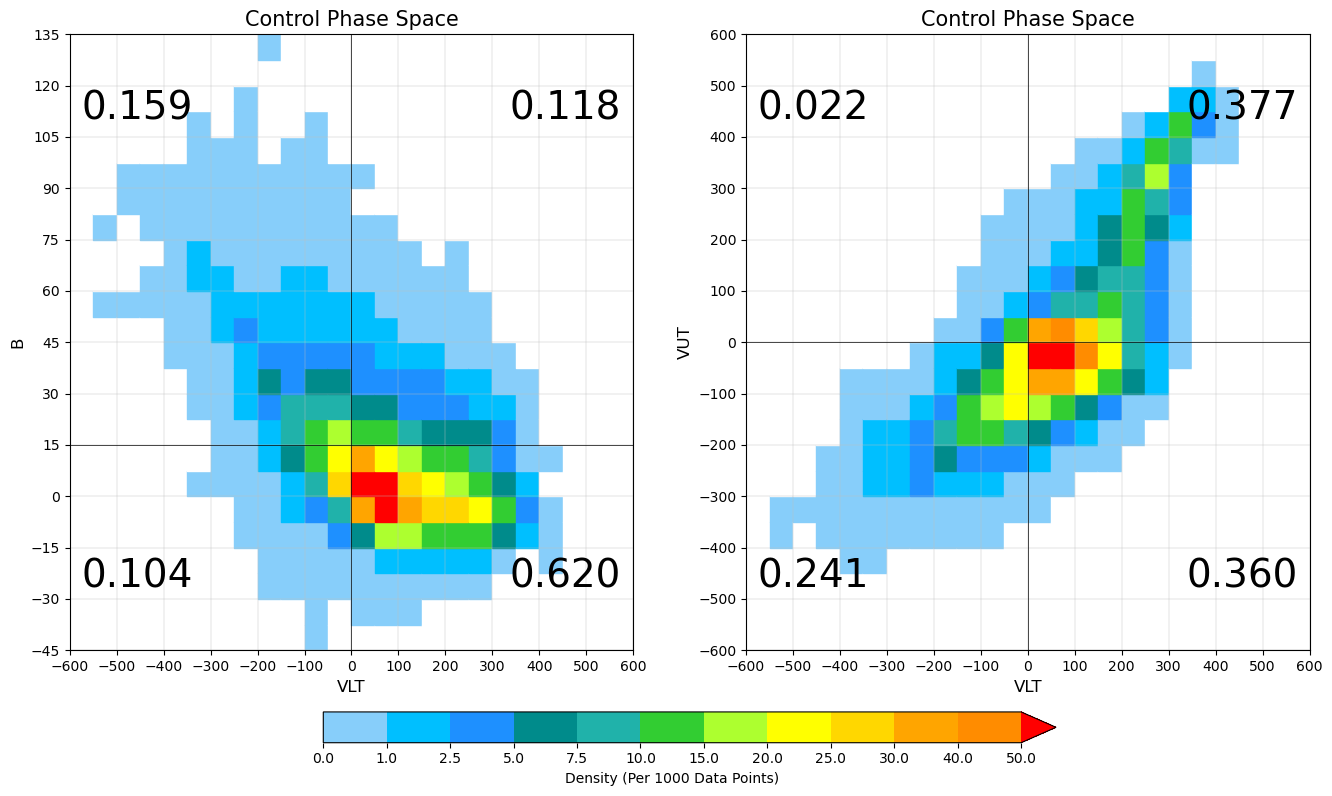

In [25]:
# Plot Phase Space Distribution For Control Run
Fig = Cyclone_Phase_Dist_Plot(Control_VLT_B_Rela, Control_VLT_VUT_Rela, VLT_Bins, B_Bins, \
Rela_Dist_Bounds, Rela_Dist_Colours, "Control", "Relative", True)

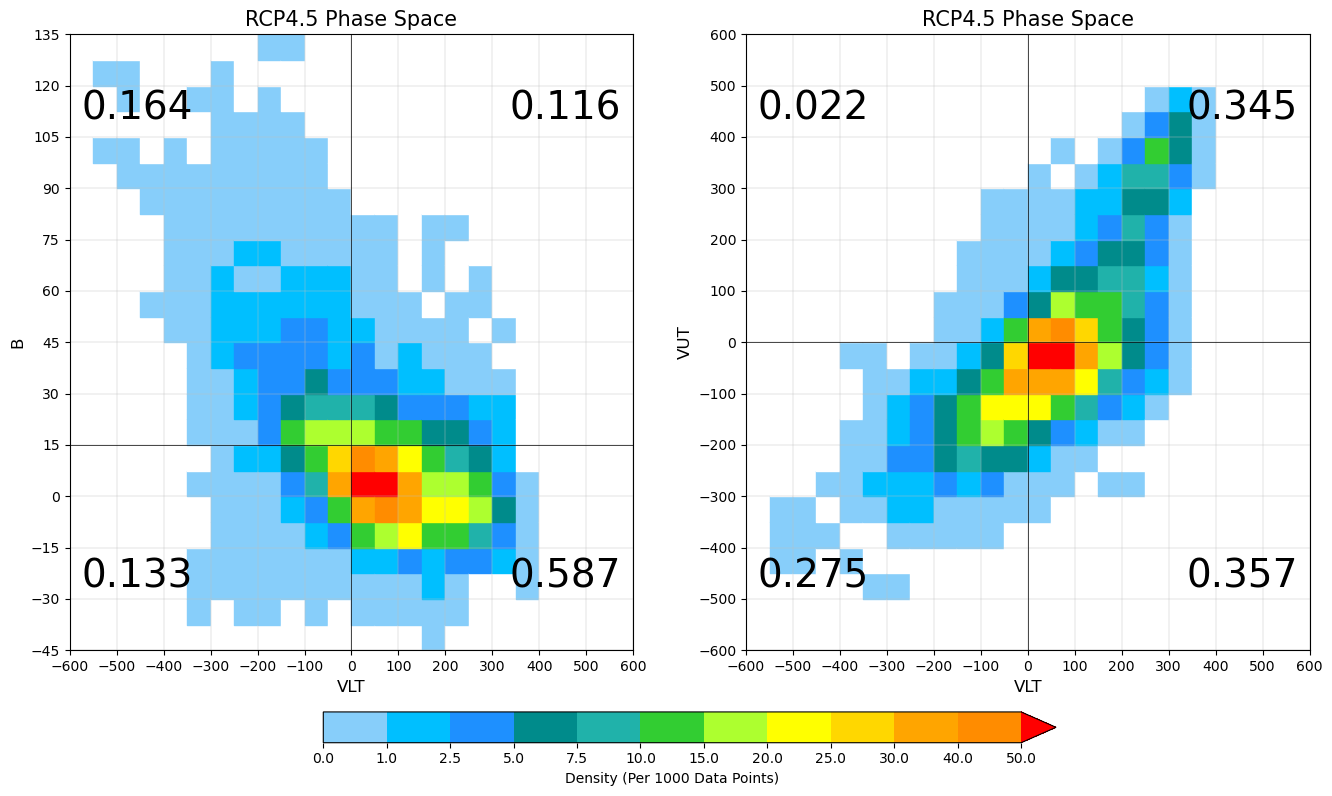

In [26]:
# Plot Phase Space Distribution For RCP4.5 Run
Fig = Cyclone_Phase_Dist_Plot(RCP45_VLT_B_Rela, RCP45_VLT_VUT_Rela, VLT_Bins, B_Bins, \
Rela_Dist_Bounds, Rela_Dist_Colours, "RCP4.5", "Relative", True)

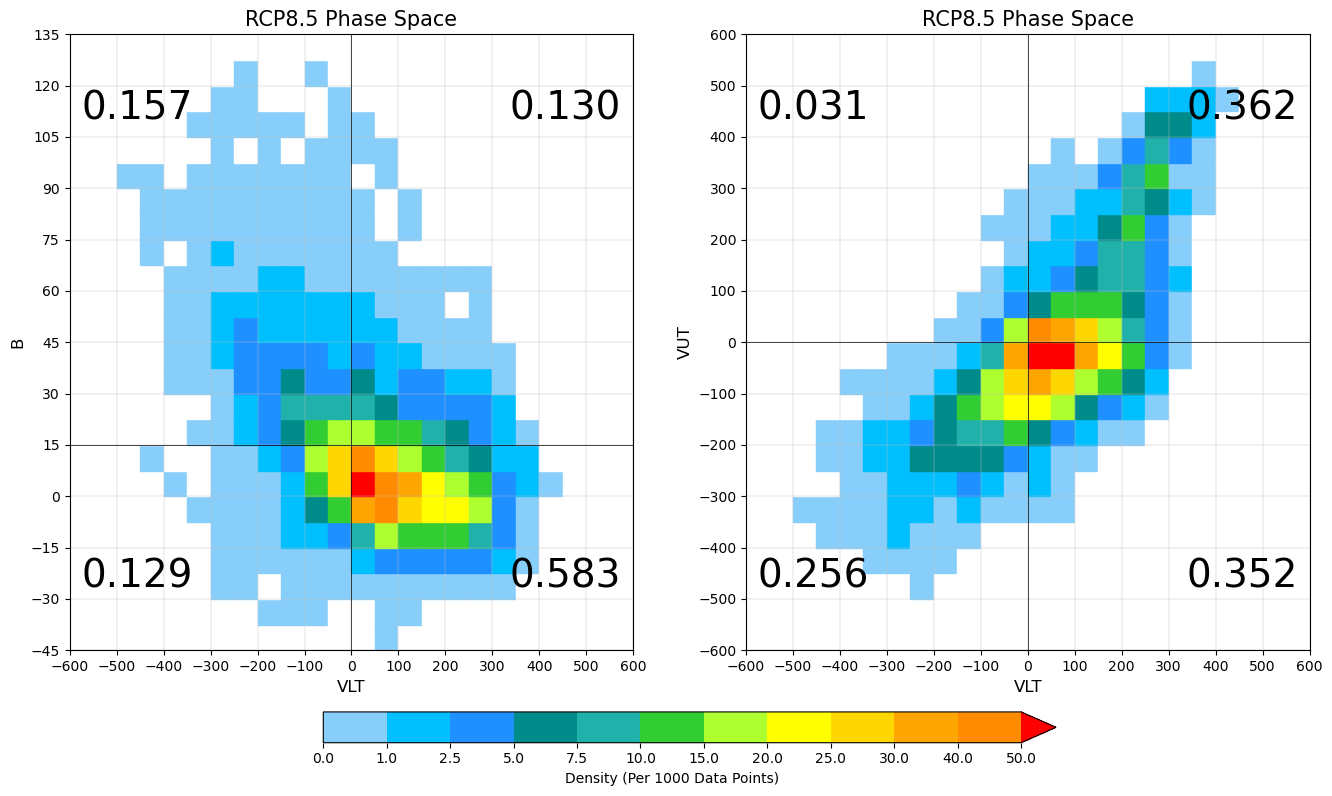

In [27]:
# Plot Phase Space Distribution For RCP8.5 Run
Fig = Cyclone_Phase_Dist_Plot(RCP85_VLT_B_Rela, RCP85_VLT_VUT_Rela, VLT_Bins, B_Bins, \
Rela_Dist_Bounds, Rela_Dist_Colours, "RCP8.5", "Relative", True)

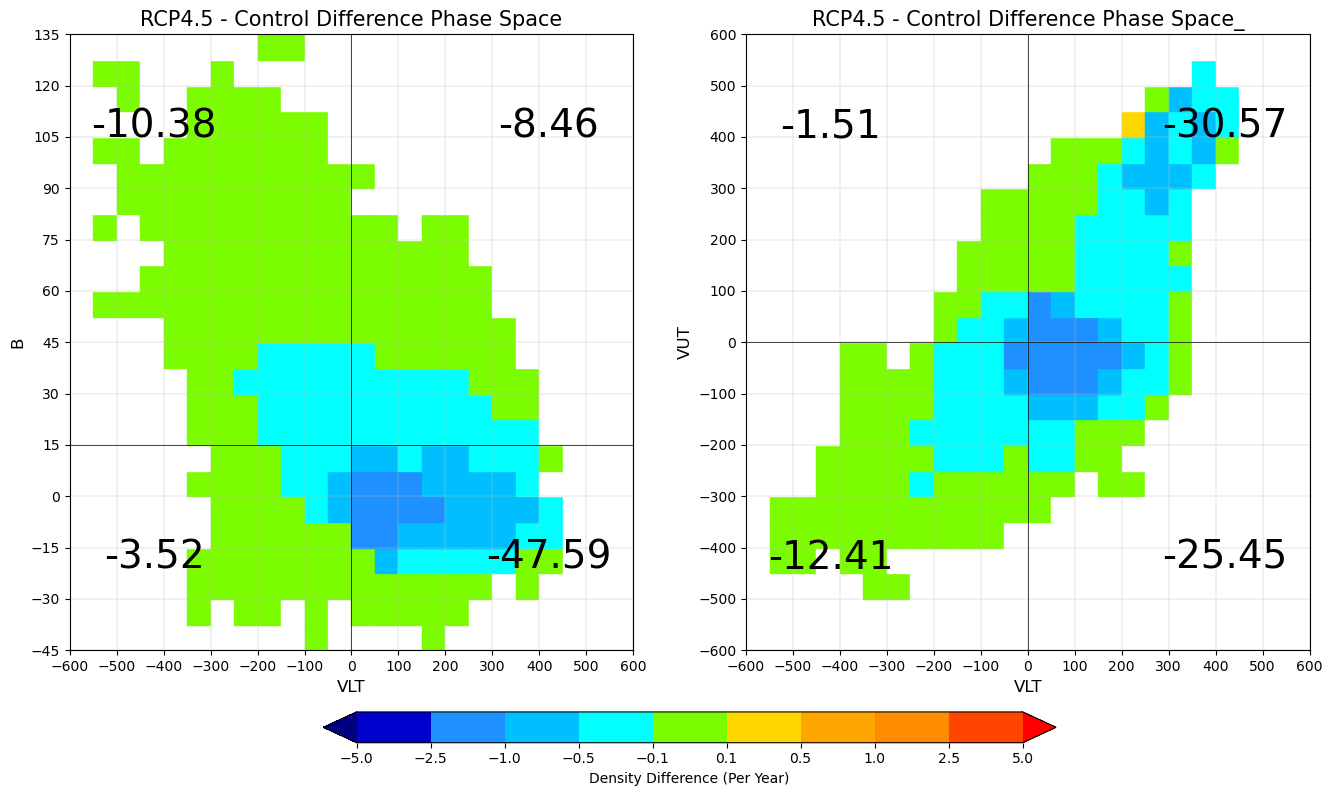

In [28]:
# Plot Difference Between Phase Space Distributions of RCP4.5 - Control
Cyclone_Phase_Diff_Plot("RCP4.5", "Control", RCP45_VLT_B_Annual, RCP45_VLT_VUT_Annual, Control_VLT_B_Annual, Control_VLT_VUT_Annual, \
VLT_Bins, B_Bins, Annual_Diff_Bounds, Annual_Diff_Colours, "Annual", True, True)

In [29]:
# Plot Difference Between Phase Space Distributions of RCP4.5 - Control
#Cyclone_Phase_Diff_Plot("RCP4.5", "Control", RCP45_VLT_B_Annual, RCP45_VLT_VUT_Annual, Control_VLT_B_Annual, Control_VLT_VUT_Annual, \
#VLT_Bins, B_Bins, Annual_Diff_Bounds, Annual_Diff_Colours, "Annual", False, False)

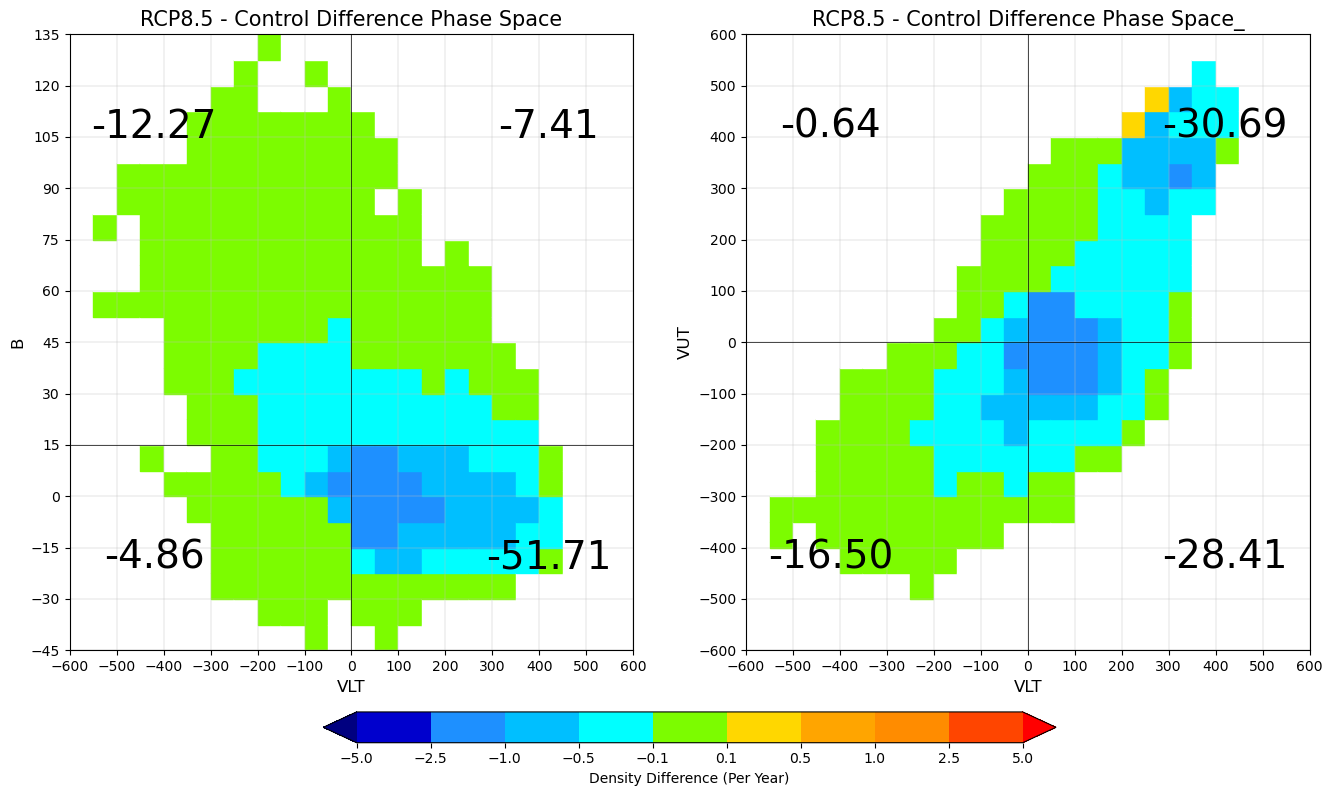

In [30]:
# Plot Difference Between Phase Space Distributions of RCP8.5 - Control
Cyclone_Phase_Diff_Plot("RCP8.5", "Control", RCP85_VLT_B_Annual, RCP85_VLT_VUT_Annual, Control_VLT_B_Annual, Control_VLT_VUT_Annual, \
VLT_Bins, B_Bins, Annual_Diff_Bounds, Annual_Diff_Colours, "Annual", True, True)

In [31]:
# Plot Difference Between Phase Space Distributions of RCP8.5 - Control
#Cyclone_Phase_Diff_Plot("RCP8.5", "Control", RCP85_VLT_B_Annual, RCP85_VLT_VUT_Annual, Control_VLT_B_Annual, Control_VLT_VUT_Annual, \
#VLT_Bins, B_Bins, Annual_Diff_Bounds, Annual_Diff_Colours, "Annual", False, False)

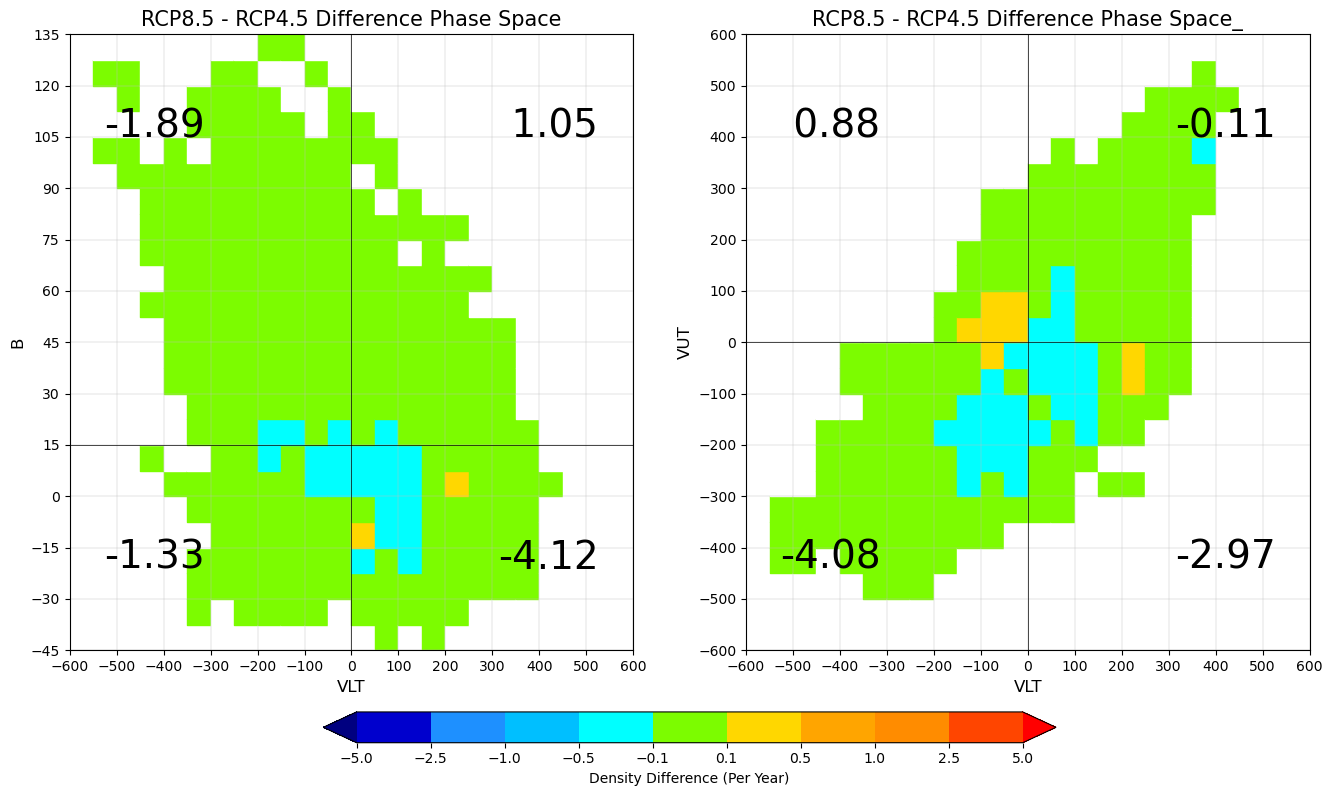

In [32]:
# Plot Difference Between Phase Space Distributions of RCP8.5 - RCP4.5
Cyclone_Phase_Diff_Plot("RCP8.5", "RCP4.5", RCP85_VLT_B_Annual, RCP85_VLT_VUT_Annual, RCP45_VLT_B_Annual, RCP45_VLT_VUT_Annual, \
VLT_Bins, B_Bins, Annual_Diff_Bounds, Annual_Diff_Colours, "Annual", True, True)

In [33]:
# Plot Difference Between Phase Space Distributions of RCP8.5 - RCP4.5
#Cyclone_Phase_Diff_Plot("RCP8.5", "RCP4.5", RCP85_VLT_B_Annual, RCP85_VLT_VUT_Annual, RCP45_VLT_B_Annual, RCP45_VLT_VUT_Annual, \
#VLT_Bins, B_Bins, Annual_Diff_Bounds, Annual_Diff_Colours, "Annual", False, False)

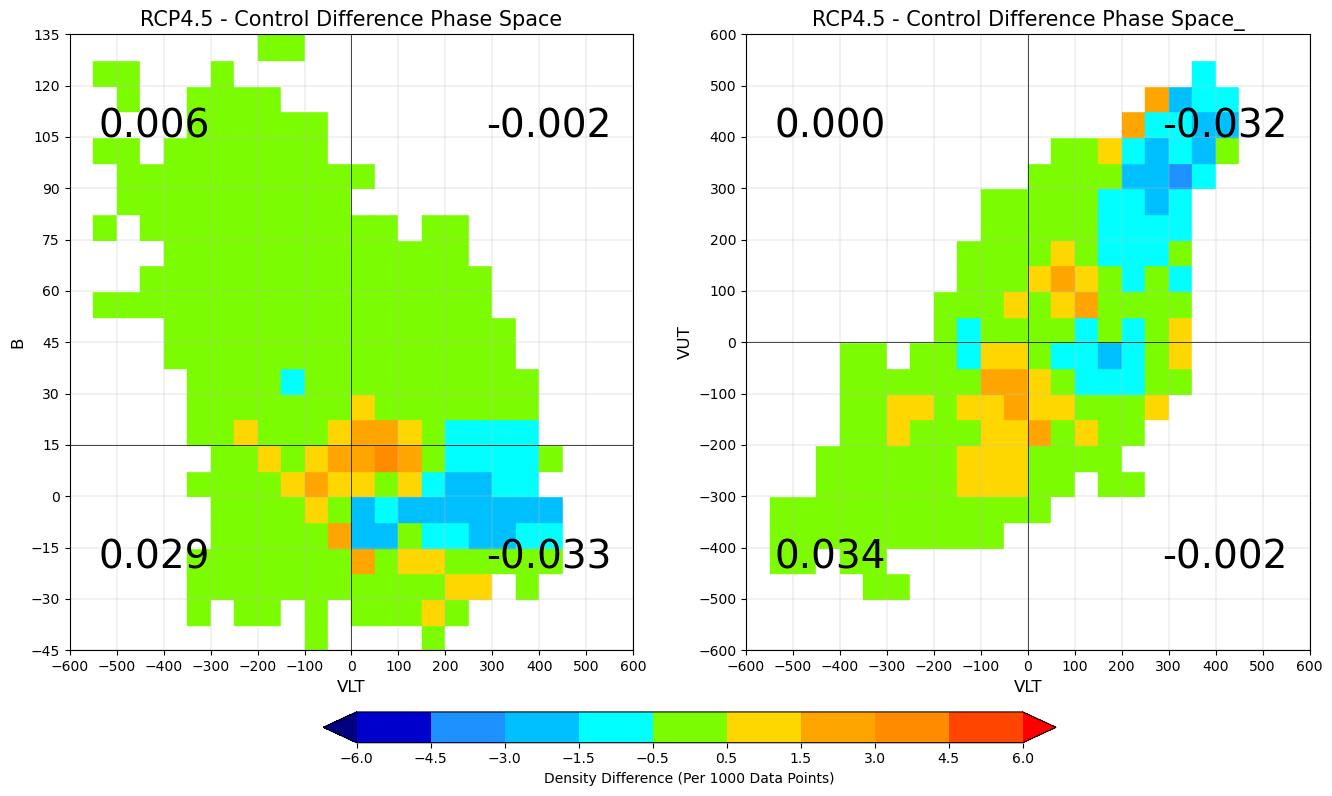

In [34]:
# Plot Difference Between Phase Space Distributions of RCP4.5 - Control
Cyclone_Phase_Diff_Plot("RCP4.5", "Control", RCP45_VLT_B_Rela, RCP45_VLT_VUT_Rela, Control_VLT_B_Rela, Control_VLT_VUT_Rela, \
VLT_Bins, B_Bins, Rela_Diff_Bounds, Rela_Diff_Colours, "Relative", True, True)

In [35]:
# Plot Difference Between Phase Space Distributions of RCP4.5 - Control
#Cyclone_Phase_Diff_Plot("RCP4.5", "Control", RCP45_VLT_B_Rela, RCP45_VLT_VUT_Rela, Control_VLT_B_Rela, Control_VLT_VUT_Rela, \
#VLT_Bins, B_Bins, Rela_Diff_Bounds, Rela_Diff_Colours, "Relative", False, False)

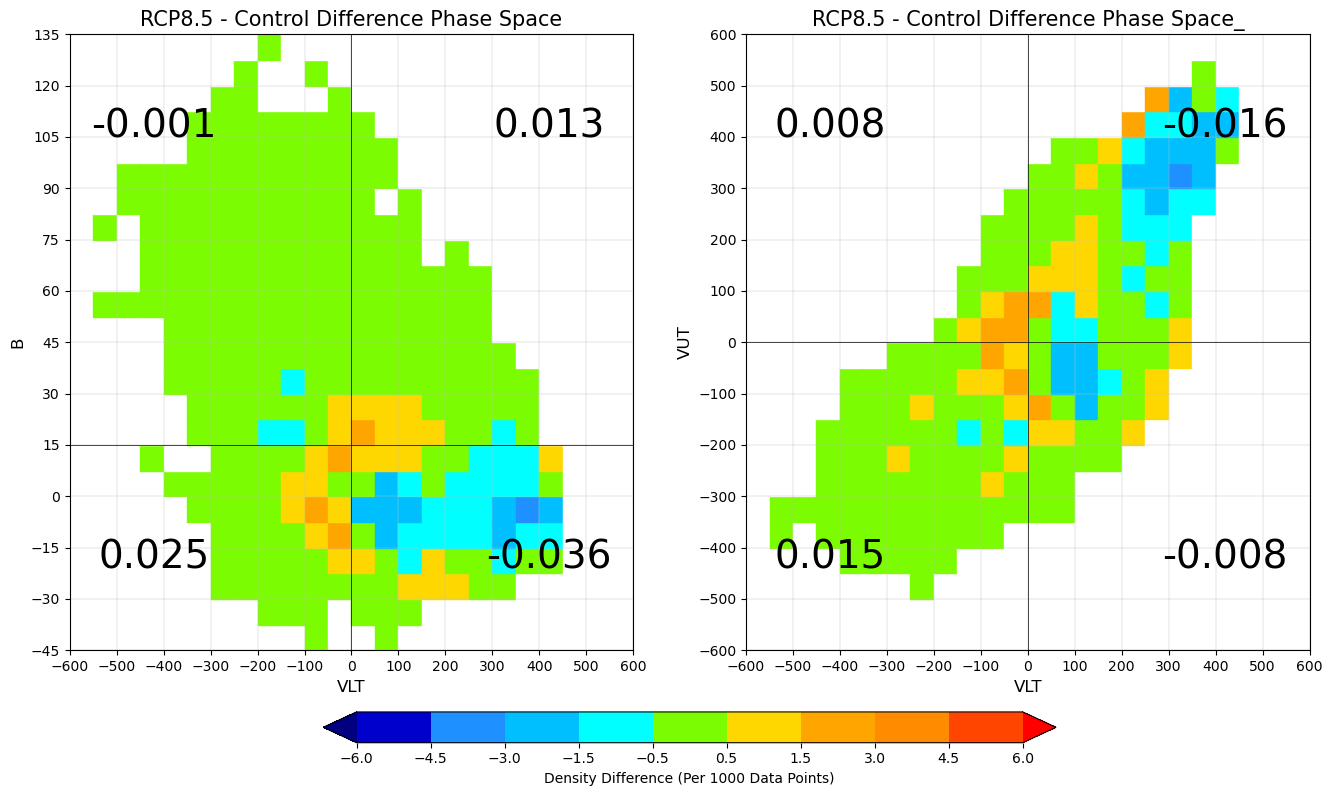

In [36]:
# Plot Difference Between Phase Space Distributions of RCP8.5 - Control
Cyclone_Phase_Diff_Plot("RCP8.5", "Control", RCP85_VLT_B_Rela, RCP85_VLT_VUT_Rela, Control_VLT_B_Rela, Control_VLT_VUT_Rela, \
VLT_Bins, B_Bins, Rela_Diff_Bounds, Rela_Diff_Colours, "Relative", True, True)

In [37]:
# Plot Difference Between Phase Space Distributions of RCP8.5 - Control
#Cyclone_Phase_Diff_Plot("RCP8.5", "Control", RCP85_VLT_B_Rela, RCP85_VLT_VUT_Rela, Control_VLT_B_Rela, Control_VLT_VUT_Rela, \
#VLT_Bins, B_Bins, Rela_Diff_Bounds, Rela_Diff_Colours, "Relative", False, False)

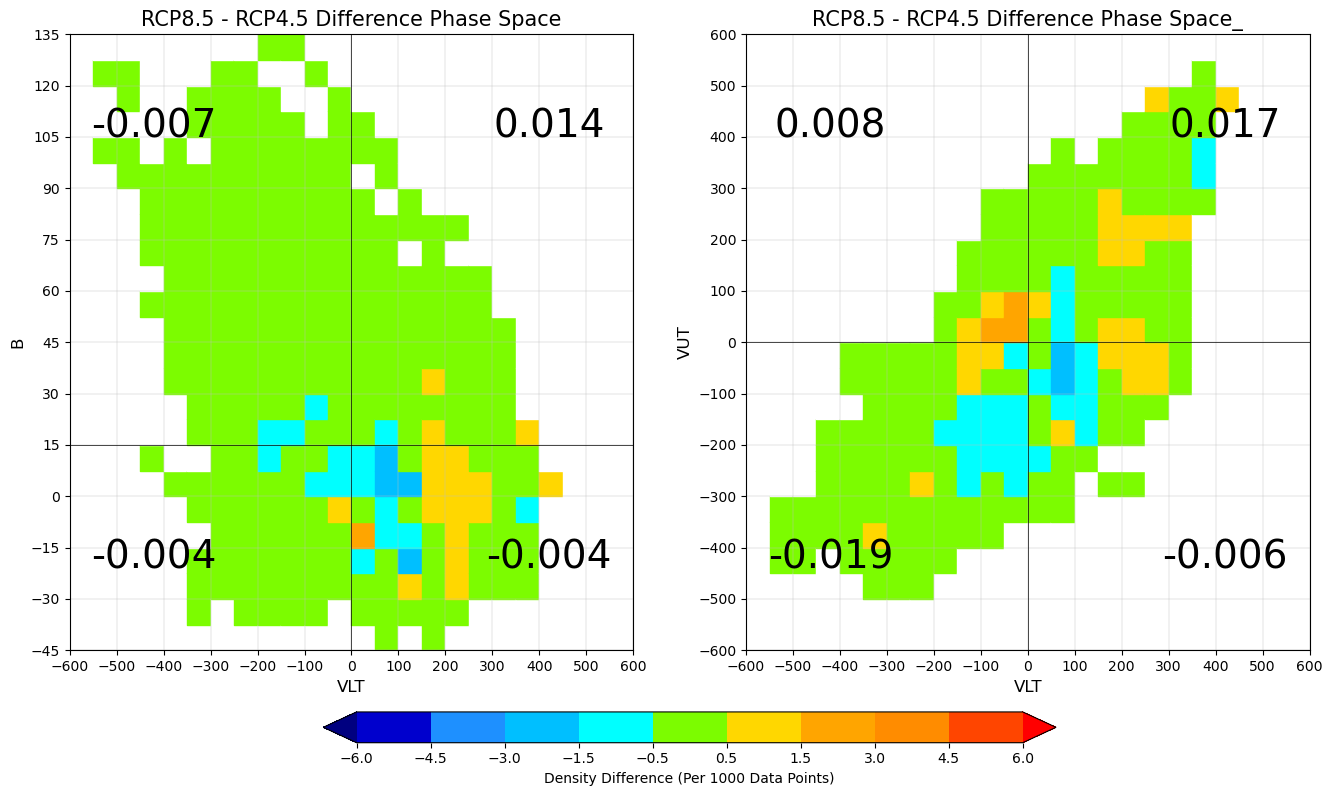

In [38]:
# Plot Difference Between Phase Space Distributions of RCP8.5 - RCP4.5
Cyclone_Phase_Diff_Plot("RCP8.5", "RCP4.5", RCP85_VLT_B_Rela, RCP85_VLT_VUT_Rela, RCP45_VLT_B_Rela, RCP45_VLT_VUT_Rela, \
VLT_Bins, B_Bins, Rela_Diff_Bounds, Rela_Diff_Colours, "Relative", True, True)

In [39]:
# Plot Difference Between Phase Space Distributions of RCP8.5 - RCP4.5
#Cyclone_Phase_Diff_Plot("RCP8.5", "RCP4.5", RCP85_VLT_B_Rela, RCP85_VLT_VUT_Rela, RCP45_VLT_B_Rela, RCP45_VLT_VUT_Rela, \
#VLT_Bins, B_Bins, Rela_Diff_Bounds, Rela_Diff_Colours, "Relative", False, False)

In [40]:
def Plot_Map_Formatting(Axis):
    Axis.coastlines(linewidth=0.5)
    Axis.add_feature(cfeature.BORDERS, linewidth=0.5)
    Axis.add_feature(cfeature.STATES, linewidth=0.3)
    x_Min = -100
    x_Max = 20
    y_Min = 10
    y_Max = 60
    x_Axis = Create_Bins(x_Min, x_Max, 10)
    y_Axis = Create_Bins(y_Min, y_Max, 10)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    Axis.set_xlim(x_Min,x_Max)
    Axis.set_ylim(y_Min,y_Max)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')

In [41]:
# Create Function to Plot ET Start and End Locations
def Plot_ET_Locations(ET_DF, Model, Savefig):
    Fig = pyplot.figure(figsize=(16,13))
#
# Plot ET Start Locations
    Axis = Fig.add_subplot(2,1,1, projection=ccrs.PlateCarree())
    Start_Lons = ET_DF["Start Lon"]
    Start_Lats = ET_DF["Start Lat"]
    for k in range(len(Start_Lats)):
        pyplot.scatter(Start_Lons[k], Start_Lats[k], marker='s', linewidths=1.8, \
        facecolors='none', edgecolors='black', s=48)
    Plot_Map_Formatting(Axis)
    Title = Model + " Extratropical Transition Initiation Locations"
    Axis.set_title(Title, fontsize=24)
#
# Plot ET End Data
    Axis = Fig.add_subplot(2,1,2, projection=ccrs.PlateCarree())
    End_Lons = ET_DF["End Lon"]
    End_Lats = ET_DF["End Lat"]
    for k in range(len(End_Lats)):
        pyplot.scatter(End_Lons[k], End_Lats[k], marker='^', linewidths=1.8, \
        facecolors='none', edgecolors='black', s=48)
    Plot_Map_Formatting(Axis)
    Title = Model + " Extratropical Transition Completion Locations"
    Axis.set_title(Title, fontsize=24)
#
# Save Fig
    if Savefig == True:
        Figname = str(Model + '_ET_Locations.png')
        Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V3/'+Figname, bbox_inches='tight')

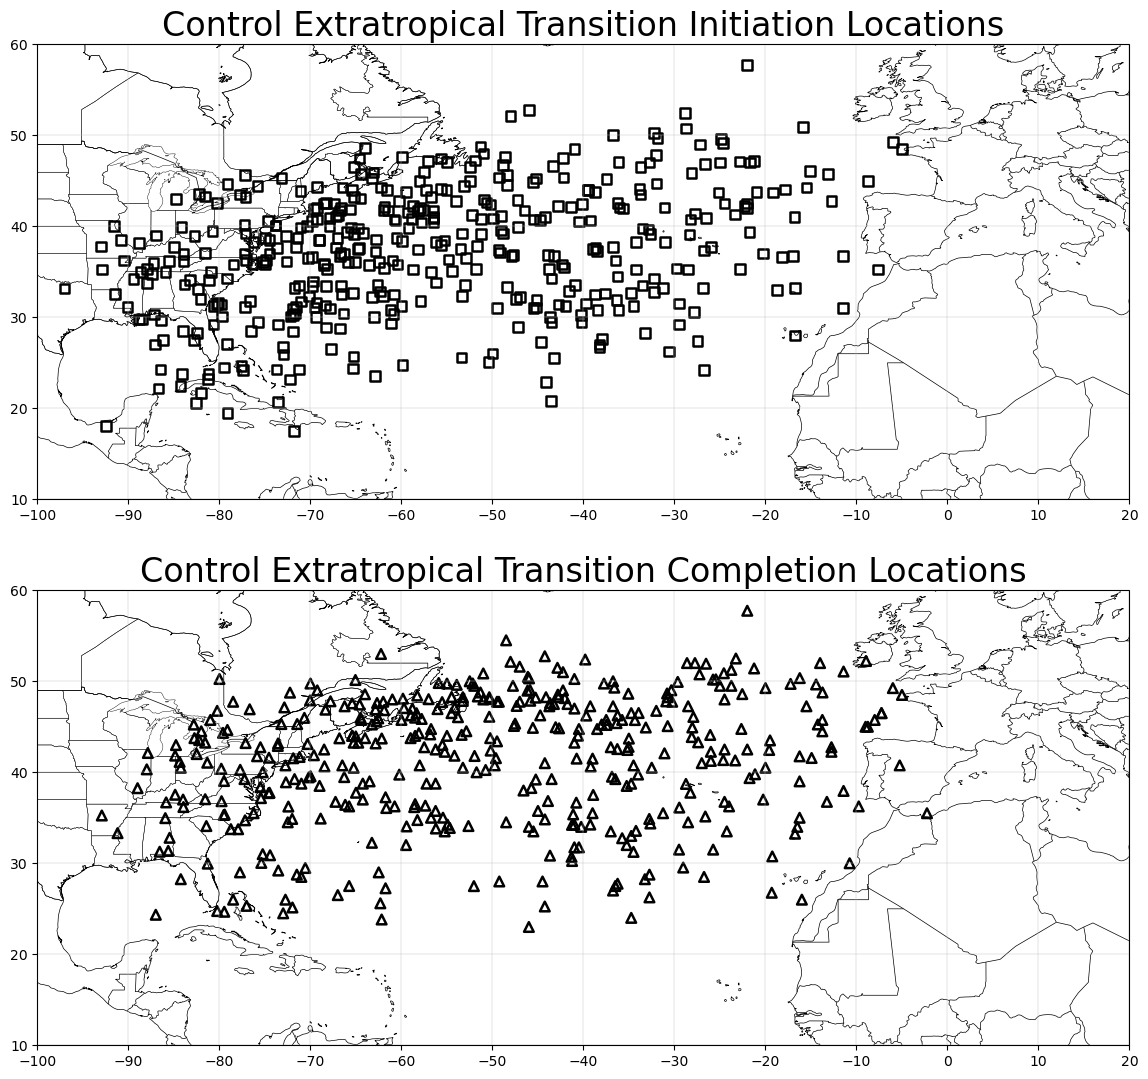

In [42]:
Plot_ET_Locations(Control_ET, "Control", True)

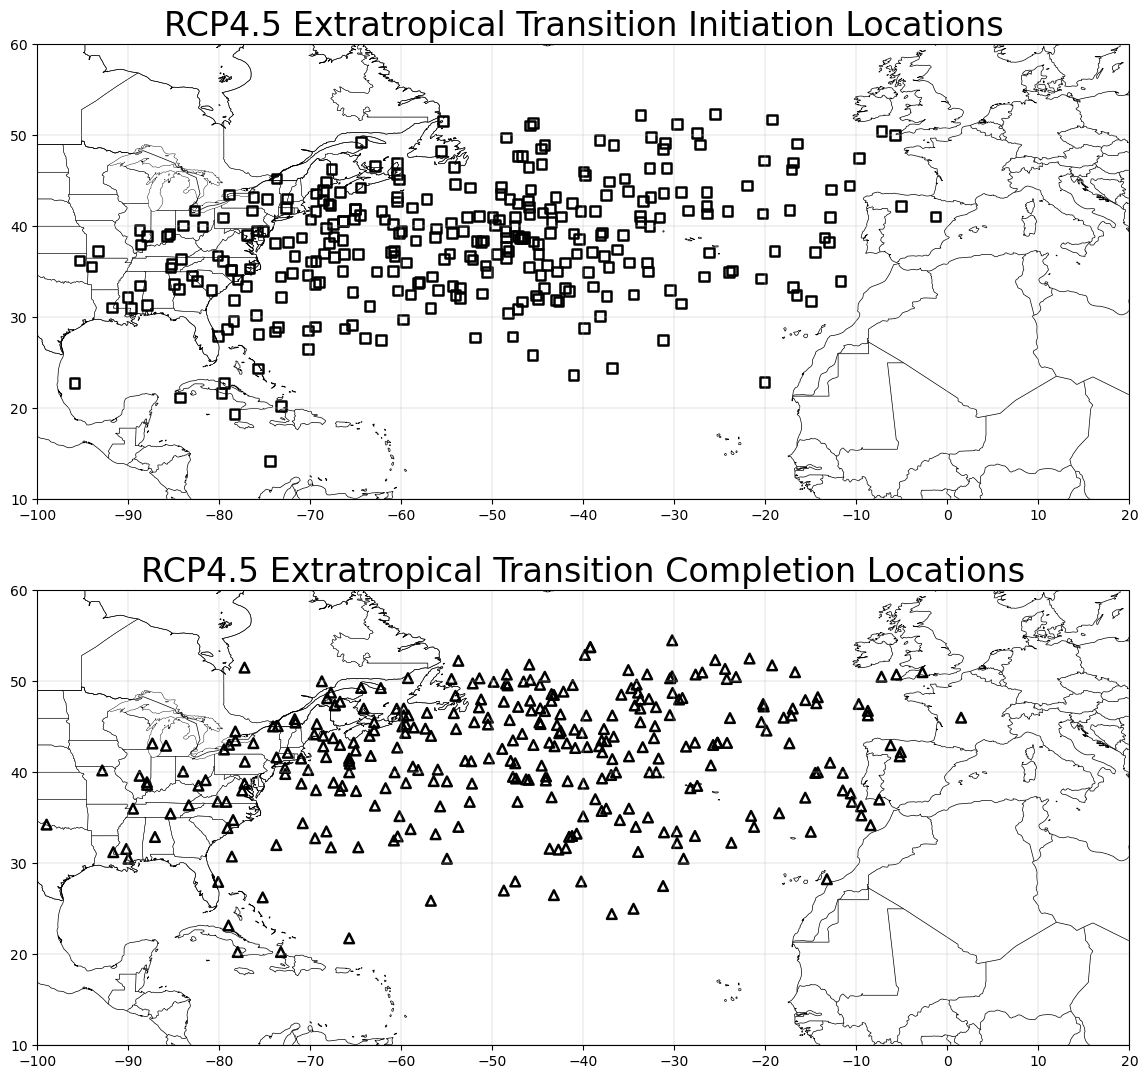

In [43]:
Plot_ET_Locations(RCP45_ET, "RCP4.5", True)

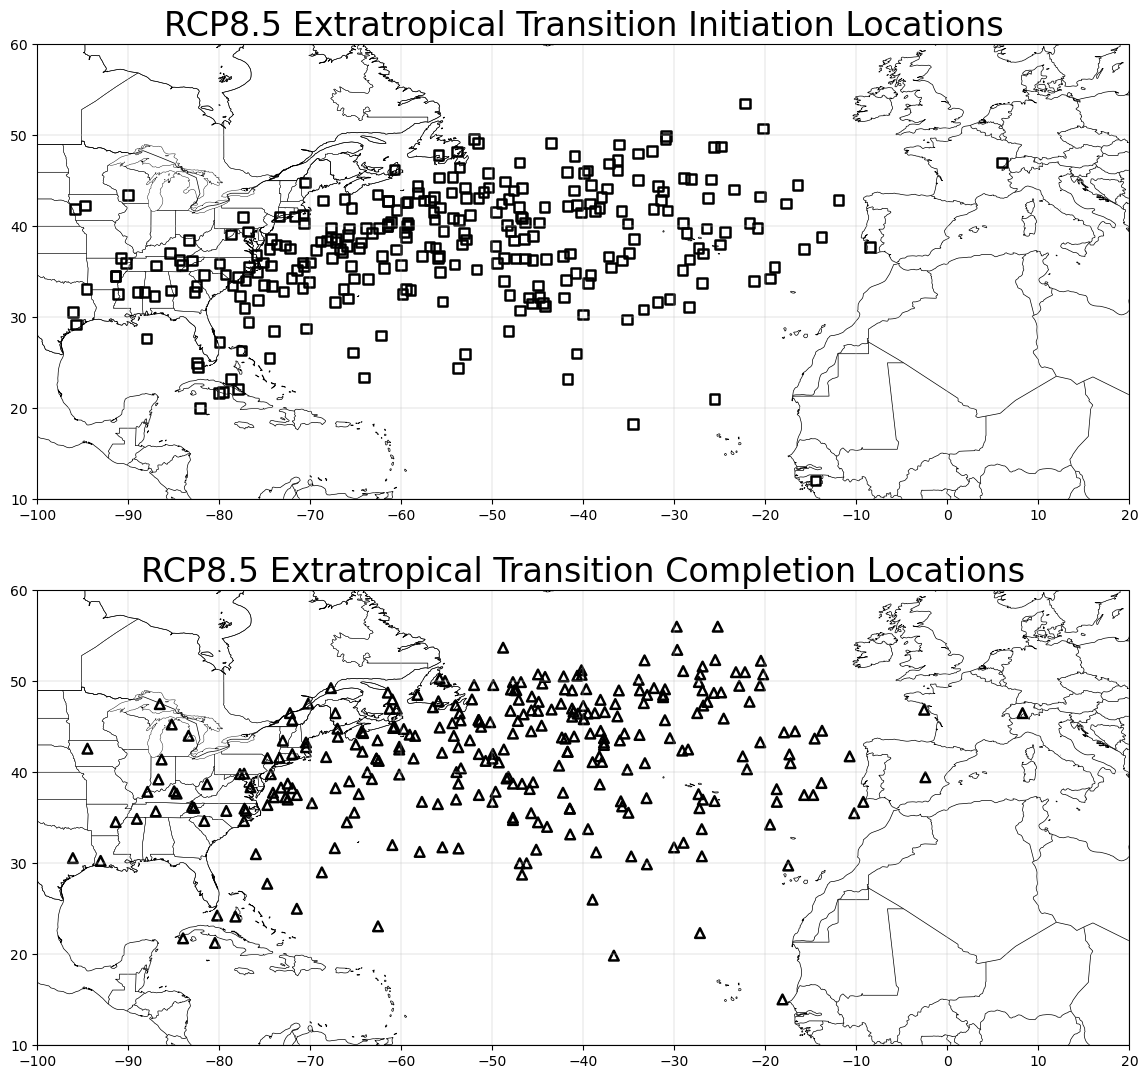

In [44]:
Plot_ET_Locations(RCP85_ET, "RCP8.5", True)

In [45]:
Lengths = numpy.zeros(3)
Lengths[0] = len(Control_ET)
Lengths[1] = len(RCP45_ET)
Lengths[2] = len(RCP85_ET)
#Lengths

In [46]:
# Create Function to Calculate Spatial Distribution of B Value
def ET_Locations_Distribution(ET_DF, Start, Absolute, Length):
    Lon_Bins = Create_Bins(-100,20,5)
    Lat_Bins = Create_Bins(10,60,5)
    Lat_Lon_Count = numpy.zeros((len(Lat_Bins)-1, len(Lon_Bins)-1))
#
# Count Lat Lon Distribution in Each Gridbox
    if Start == True:
        Lats = ET_DF["Start Lat"]
        Lons = ET_DF["Start Lon"]
    else:
        Lats = ET_DF["End Lat"]
        Lons = ET_DF["End Lon"]
    for i in range(len(Lats)):
        for j in range(len(Lat_Bins)-1):
            if Lats[i] >= (Lat_Bins[j]-5) and Lats[i] <= (Lat_Bins[j+1]+5):
                for k in range(len(Lon_Bins)-1):
                    if Lons[i] >= (Lon_Bins[k]-5) and Lons[i] <= (Lon_Bins[k+1]+5):
                        Lat_Lon_Count[j][k] += 1
    if Absolute == True:
        return (Lat_Lon_Count)
    else:
        Lat_Lon_Density = Lat_Lon_Count / Length / 90 * 10000
        return (Lat_Lon_Density)

In [47]:
# Create Function For Spatial Distribution Count Colours
Spatial_Count_Colours = ['lightskyblue', 'deepskyblue', 'dodgerblue', 'darkcyan', 'lightseagreen', \
'limegreen', 'greenyellow', 'yellow', 'gold', 'orange', 'darkorange', 'red']
Spatial_Count_Bounds = numpy.array([0,2,5,10,15,20,30,40,50,60,70,80])
Spatial_Density_Colours = ['lightskyblue', 'deepskyblue', 'dodgerblue', 'darkcyan', 'lightseagreen', \
'limegreen', 'greenyellow', 'yellow', 'gold', 'orange', 'darkorange', 'red']
Spatial_Density_Bounds = numpy.array([0,1,2,3,4,6,8,10,12,15,20,25])
#
def Spatial_Count_Colour(Count, Bounds, Colours):
    for k in range(len(Colours)):
        if Count == 0:
            Colour = 'white'
        else:
            if k != len(Colours)-1:
                if Count > Bounds[k] and Count <= Bounds[k+1]:
                    Colour = Colours[k]
            else:
                if Count > Bounds[k]:
                    Colour = Colours[k]
    return (Colour)

In [48]:
# Create Function to Plot ET Start and End Locations
def Plot_ET_Dist(Spatial_Start, Spatial_End, Model, Absolute, Bounds, Colours, Savefig):
    Fig = pyplot.figure(figsize=(16,16))
    Lon_Bins = Create_Bins(-100,20,5)
    Lat_Bins = Create_Bins(10,60,5)
#
# Plot ET Start Data
    Axis = Fig.add_subplot(2,1,1, projection=ccrs.PlateCarree())
    for j in range(len(Spatial_Start)):
        for k in range(len(Spatial_Start[0])):
            Colour = Spatial_Count_Colour(Spatial_Start[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis)
    Title = Model + " Extratropical Transition Initiation Spatial Distribution"
    Axis.set_title(Title, fontsize=24)
#
# Colour Bar
    if Absolute == True:
        Cbar_Label = 'Absolute Frequency (Per 90 Years)'
    else:
        Cbar_Label = 'Annual Relative Frequency (Per 10000 Data Points)'
    C_Map = mcolors.LinearSegmentedColormap.from_list("Relative Frequency of Locations", Colours, N=len(Colours))
    Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='max')
    Cax = Axis.inset_axes([0.11, -0.12, 0.78, 0.05], transform=Axis.transAxes)
    Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, ticks=Bounds, \
    label=Cbar_Label)
#
#
# Plot ET End Data
    Axis = Fig.add_subplot(2,1,2, projection=ccrs.PlateCarree())
    for j in range(len(Spatial_End)):
        for k in range(len(Spatial_End[0])):
            Colour = Spatial_Count_Colour(Spatial_End[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis)
    Title = Model + " Extratropical Transition Completion Spatial Distribution"
    Axis.set_title(Title, fontsize=24)
#
# Save Fig
    if Savefig == True:
        Figname = str(Model + '_ET_Spatial_Dist.png')
        Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V3/'+Figname, bbox_inches='tight')

In [49]:
# Calculate Difference Between Models
def Spatial_Diff(Var1, Var2):
    Diff = numpy.zeros((len(Var1),len(Var1[0])))
    for i in range(len(Var1)):
        for j in range(len(Var1[0])):
            if Var1[i][j] != 0 or Var2[i][j] != 0:
                Diff[i][j] = Var1[i][j] - Var2[i][j]
            else:
                Diff[i][j] = 0
    return (Diff)

In [50]:
# Calculate Difference Between Models
def Spatial_Diff_New(Var_1, Var_2):
    Diff = Spatial_Diff_Smoothing(Var_1, Var_2)
    return (Diff)

In [51]:
# Calculate Difference Between Models
def Spatial_Diff_Smoothing(Var1, Var2):
    Diff = Var1 - Var2
    Sum = Var1 + Var2
    Diff_Smoothen = numpy.zeros((len(Diff), len(Diff[0])))
    for i in range(len(Diff)):
        F = len(Diff)-1
        for j in range(len(Diff[0])):
            G = len(Diff[0])-1
            if i > 0 and i < F and j > 0 and j < G:
                Orig_Diff = Diff[i][j]
                Orig_Sum = Sum[i][j]
                if Orig_Sum > 0.0001:
                    Surround_Diffs = numpy.array([Diff[i-1][j], Diff[i+1][j], Diff[i][j-1], Diff[i][j+1]])
                    Surround_Sums = numpy.array([Sum[i-1][j], Sum[i+1][j], Sum[i][j-1], Sum[i][j+1]])
                    Total_Sum = numpy.sum(Surround_Sums) + Orig_Sum * 6
                    if Total_Sum > 0.0001:
                        Orig_Ratio = Orig_Sum / Total_Sum
                        Surround_Ratios = Surround_Sums / Total_Sum
                        Ratioed_Diffs = Surround_Diffs * Surround_Ratios
                        Ratioed_Diff = numpy.sum(Ratioed_Diffs)
                        Diff_Smoothen[i][j] = Orig_Diff * Orig_Ratio + Ratioed_Diff * (1-Orig_Ratio)
                    else:
                        Diff_Smoothen[i][j] = Diff[i][j]
                else:
                    Diff_Smoothen[i][j] = 0
            else:
                Diff_Smoothen[i][j] = Diff[i][j]
    return (Diff_Smoothen)

In [52]:
Spatial_Diff_Colours = ['navy', 'mediumblue', 'dodgerblue', 'deepskyblue', 'cyan', 'lawngreen', \
'gold', 'orange', 'darkorange', 'orangered', 'red']
Spatial_Diff_Bounds = numpy.array([-4,-3,-2,-1,-0.3,0.3,1,2,3,4])
#Spatial_Diff_Bounds = numpy.array([-6,-4.5,-3,-1.5,-0.5,0.5,1.5,3,4.5,6])
def Spatial_Diff_Colour(Diff, Bounds, Colours):
    for k in range(len(Colours)):
        if Diff == 0:
            Colour = 'white'
        else:
            if k == 0:
                if Diff <= Bounds[k]:
                    Colour = Colours[k]
            elif k < len(Colours)-1:
                if Diff <= Bounds[k] and Diff > Bounds[k-1]:
                    Colour = Colours[k]
            else:
                if Diff > Bounds[k-1]:
                    Colour = Colours[k]
    return (Colour)

In [53]:
# Create Function to Plot ET Start and End Locations
def Plot_ET_Dist_Diff(Start_1, Start_2, End_1, End_2, Model_1, Model_2, Bounds, Colours, New, Savefig):
# Apply Difference Between Models Function
    Start_Diff = numpy.zeros((len(Start_1),len(Start_1[0])))
    End_Diff = numpy.zeros((len(End_1),len(End_1[0])))
    if New == False:
        Start_Diff = Spatial_Diff(Start_1, Start_2)
        End_Diff = Spatial_Diff(End_1, End_2)
    else:
        Start_Diff = Spatial_Diff_New(Start_1, Start_2)
        End_Diff = Spatial_Diff_New(End_1, End_2)
#        print (Diff)
#
# Plot ET Start Data
    Fig = pyplot.figure(figsize=(16,16))
    Axis = Fig.add_subplot(2,1,1, projection=ccrs.PlateCarree())
    Lon_Bins = Create_Bins(-100,20,5)
    Lat_Bins = Create_Bins(10,60,5)
    for j in range(len(Start_Diff)):
        for k in range(len(Start_Diff[0])):
            Colour = Spatial_Diff_Colour(Start_Diff[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis)
    Title = Model_1 + " - " + Model_2 + " Difference ET Transition Initiation Spatial Distribution"
    Axis.set_title(Title, fontsize=24)
#
# Colour Bar
    Cbar_Label = 'Annual Relative Frequency Difference (Per 10000 Data Points)'
    C_Map = mcolors.LinearSegmentedColormap.from_list("Relative Frequency of Locations", Colours, N=len(Colours))
    Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='both')
    Cax = Axis.inset_axes([0.11, -0.12, 0.78, 0.05], transform=Axis.transAxes)
    Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, ticks=Bounds, \
    label=Cbar_Label)
#
# Plot ET End Data
    Axis = Fig.add_subplot(2,1,2, projection=ccrs.PlateCarree())
    for j in range(len(End_Diff)):
        for k in range(len(End_Diff[0])):
            Colour = Spatial_Diff_Colour(End_Diff[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis)
    Title = Model_1 + " - " + Model_2 + " Difference ET Transition Completion Spatial Distribution"
    Axis.set_title(Title, fontsize=24)
#
# Save Fig
    if Savefig == True:
        Figname = str(Model_1 + '-' + Model_2 + '_ET_Spatial_Diff.png')
        Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V3/'+Figname, bbox_inches='tight')

In [54]:
#Control_ET_Start_Count = ET_Locations_Distribution(Control_ET, True, True, Lengths[0])
#RCP45_ET_Start_Count = ET_Locations_Distribution(RCP45_ET, True, True, Lengths[1])
#RCP85_ET_Start_Count = ET_Locations_Distribution(RCP85_ET, True, True, Lengths[2])

In [55]:
#Control_ET_End_Count = ET_Locations_Distribution(Control_ET, False, True, Lengths[0])
#RCP45_ET_End_Count = ET_Locations_Distribution(RCP45_ET, False, True, Lengths[1])
#RCP85_ET_End_Count = ET_Locations_Distribution(RCP85_ET, False, True, Lengths[2])

In [56]:
Control_ET_Start_Density = ET_Locations_Distribution(Control_ET, True, False, Lengths[0])
RCP45_ET_Start_Density = ET_Locations_Distribution(RCP45_ET, True, False, Lengths[1])
RCP85_ET_Start_Density = ET_Locations_Distribution(RCP85_ET, True, False, Lengths[2])

In [57]:
Control_ET_End_Density = ET_Locations_Distribution(Control_ET, False, False, Lengths[0])
RCP45_ET_End_Density = ET_Locations_Distribution(RCP45_ET, False, False, Lengths[1])
RCP85_ET_End_Density = ET_Locations_Distribution(RCP85_ET, False, False, Lengths[2])

In [58]:
#Plot_ET_Dist(Control_ET_Start_Count, Control_ET_End_Count, "Control", True, Spatial_Count_Bounds, Spatial_Count_Colours, False)

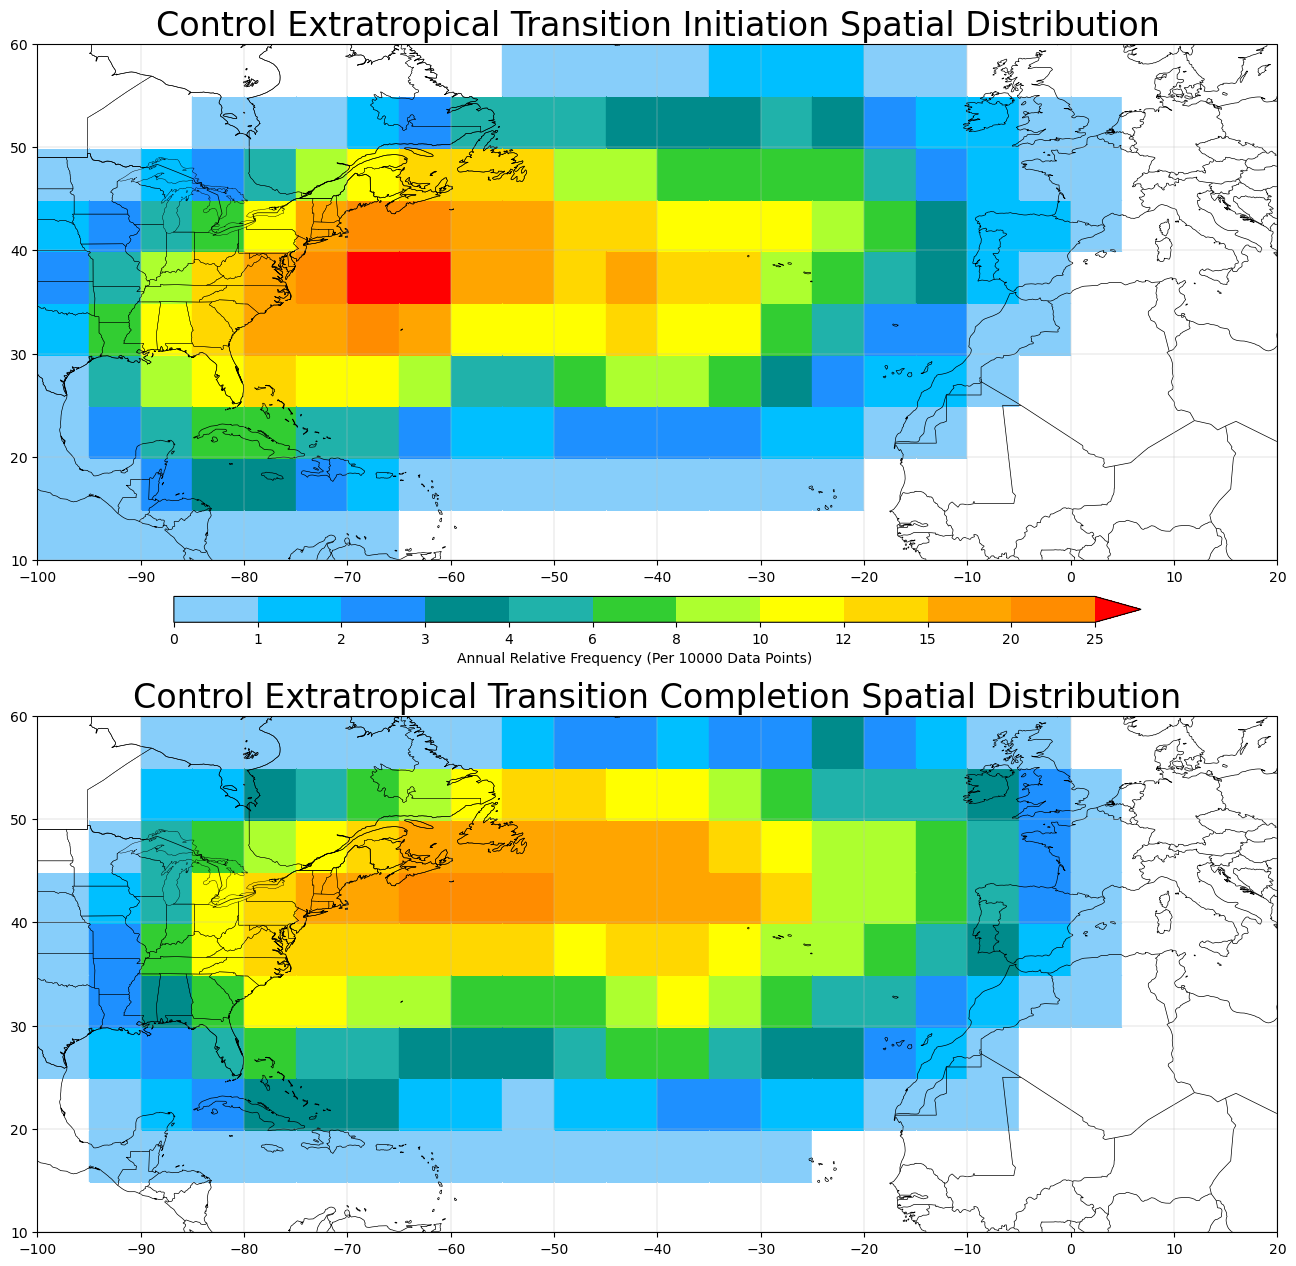

In [59]:
Plot_ET_Dist(Control_ET_Start_Density, Control_ET_End_Density, "Control", False, Spatial_Density_Bounds, Spatial_Density_Colours, True)

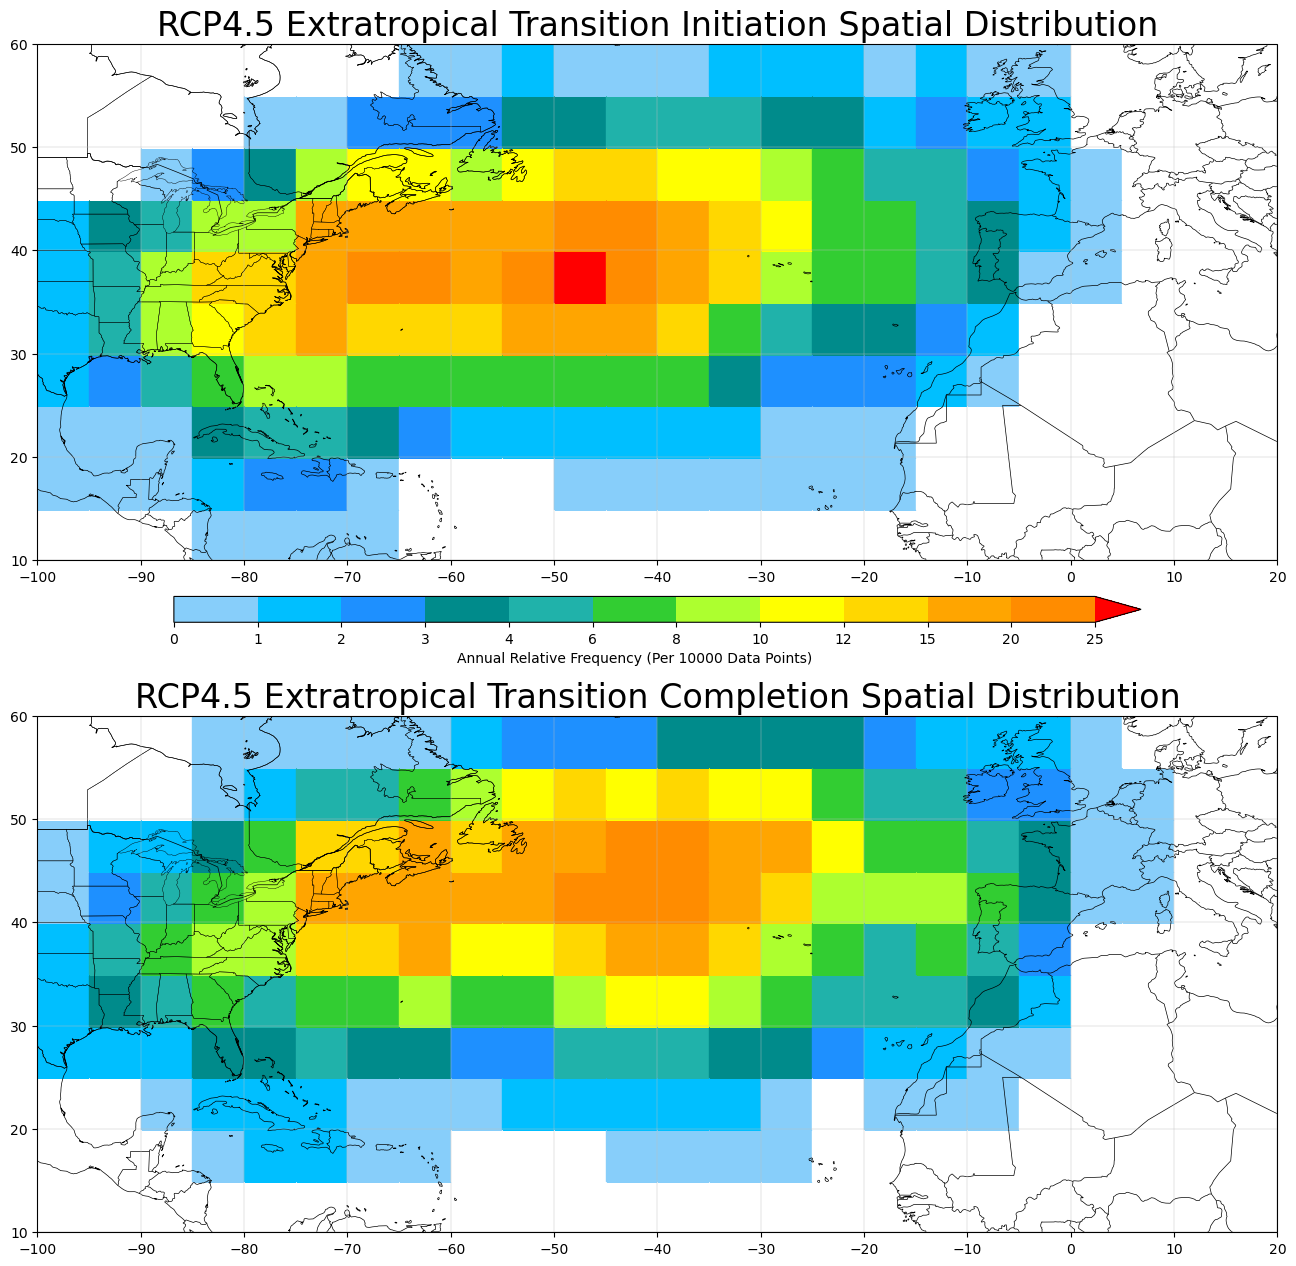

In [60]:
Plot_ET_Dist(RCP45_ET_Start_Density, RCP45_ET_End_Density, "RCP4.5", False, Spatial_Density_Bounds, Spatial_Density_Colours, True)

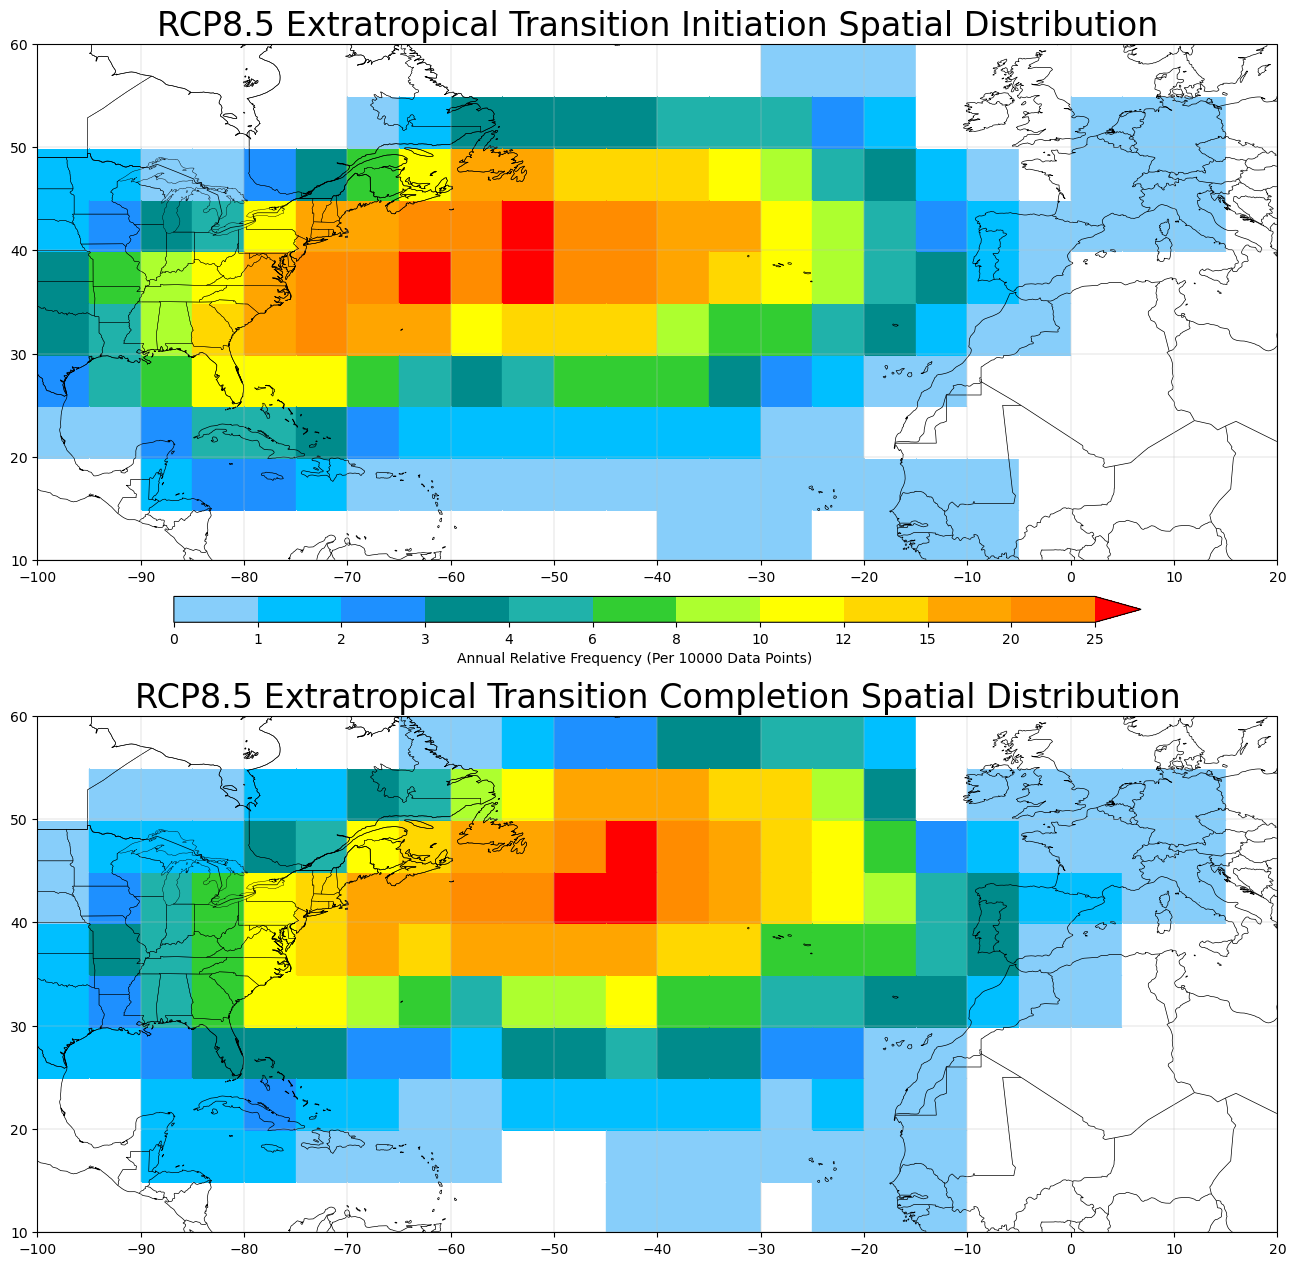

In [61]:
Plot_ET_Dist(RCP85_ET_Start_Density, RCP85_ET_End_Density, "RCP8.5", False, Spatial_Density_Bounds, Spatial_Density_Colours, True)

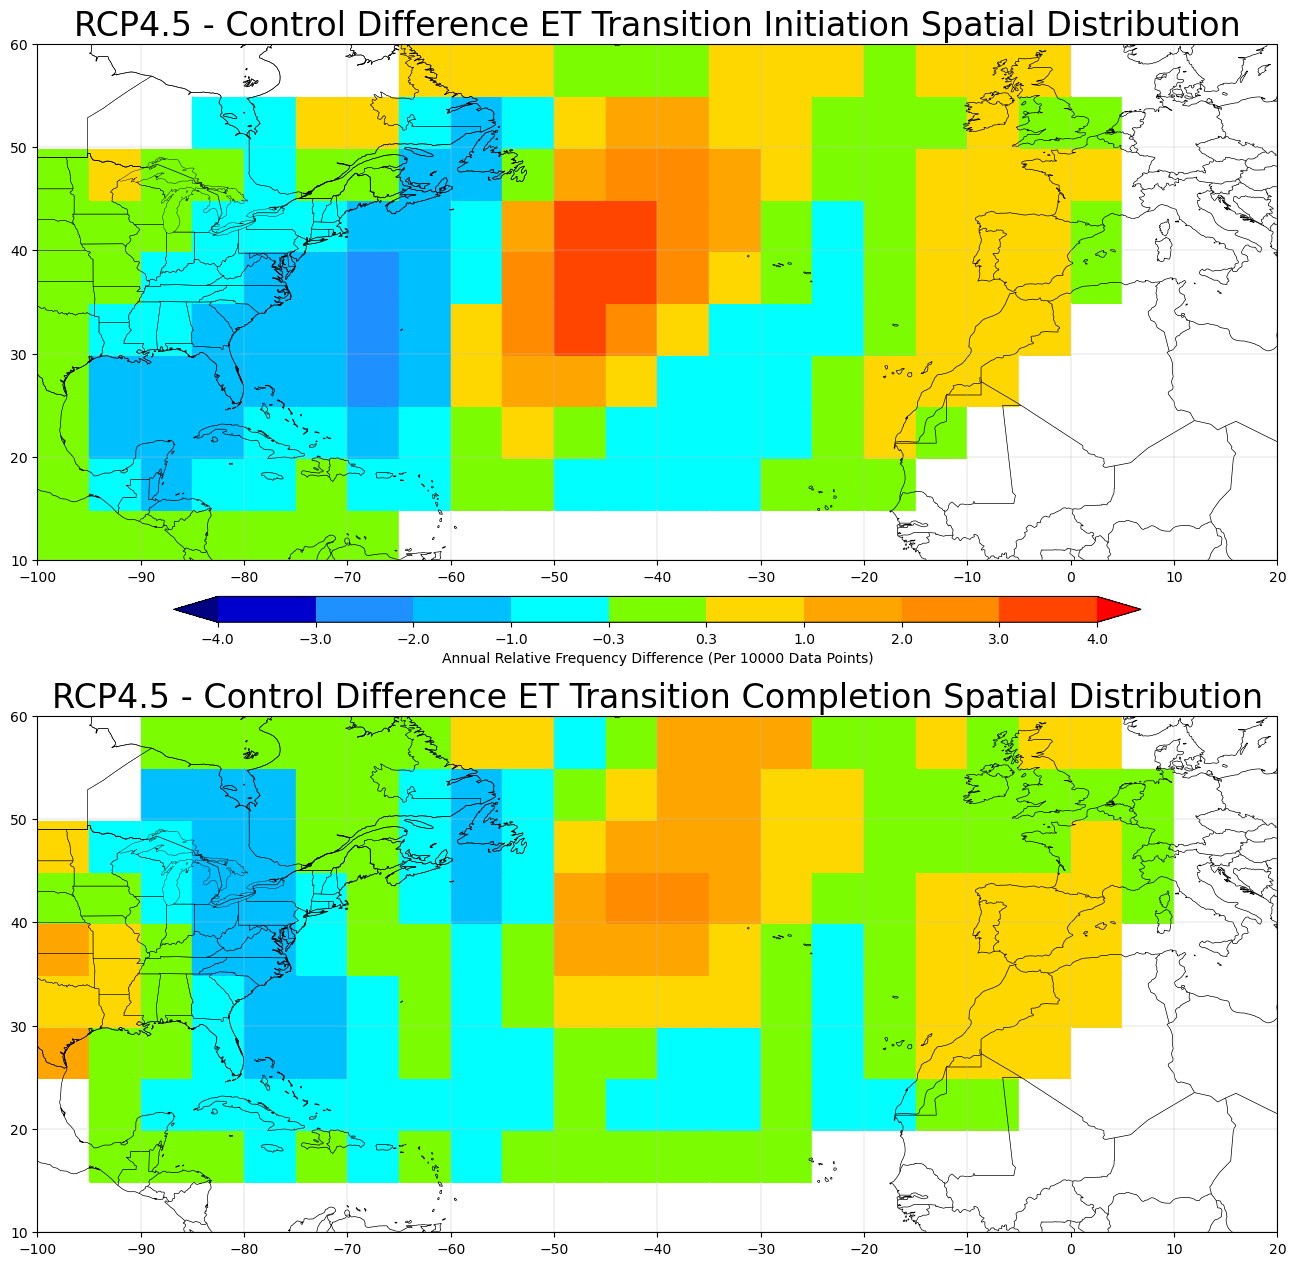

In [62]:
Plot_ET_Dist_Diff(RCP45_ET_Start_Density, Control_ET_Start_Density, RCP45_ET_End_Density, \
Control_ET_End_Density, "RCP4.5", "Control", Spatial_Diff_Bounds, Spatial_Diff_Colours, True, True)

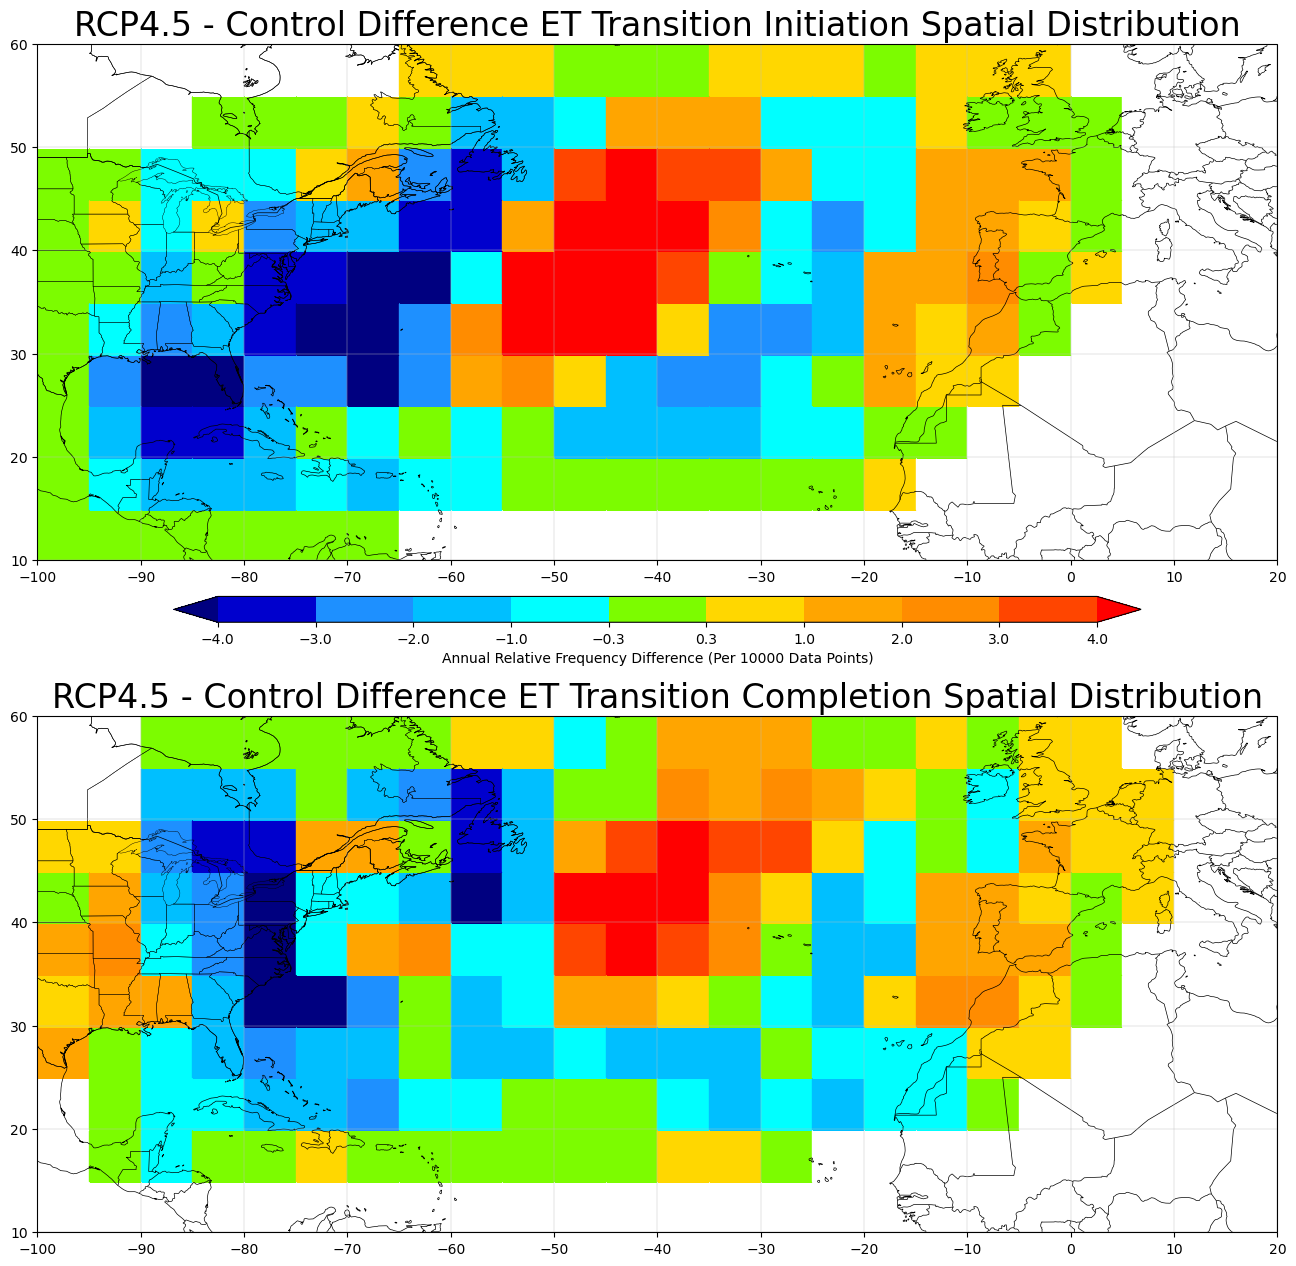

In [63]:
Plot_ET_Dist_Diff(RCP45_ET_Start_Density, Control_ET_Start_Density, RCP45_ET_End_Density, \
Control_ET_End_Density, "RCP4.5", "Control", Spatial_Diff_Bounds, Spatial_Diff_Colours, False, False)

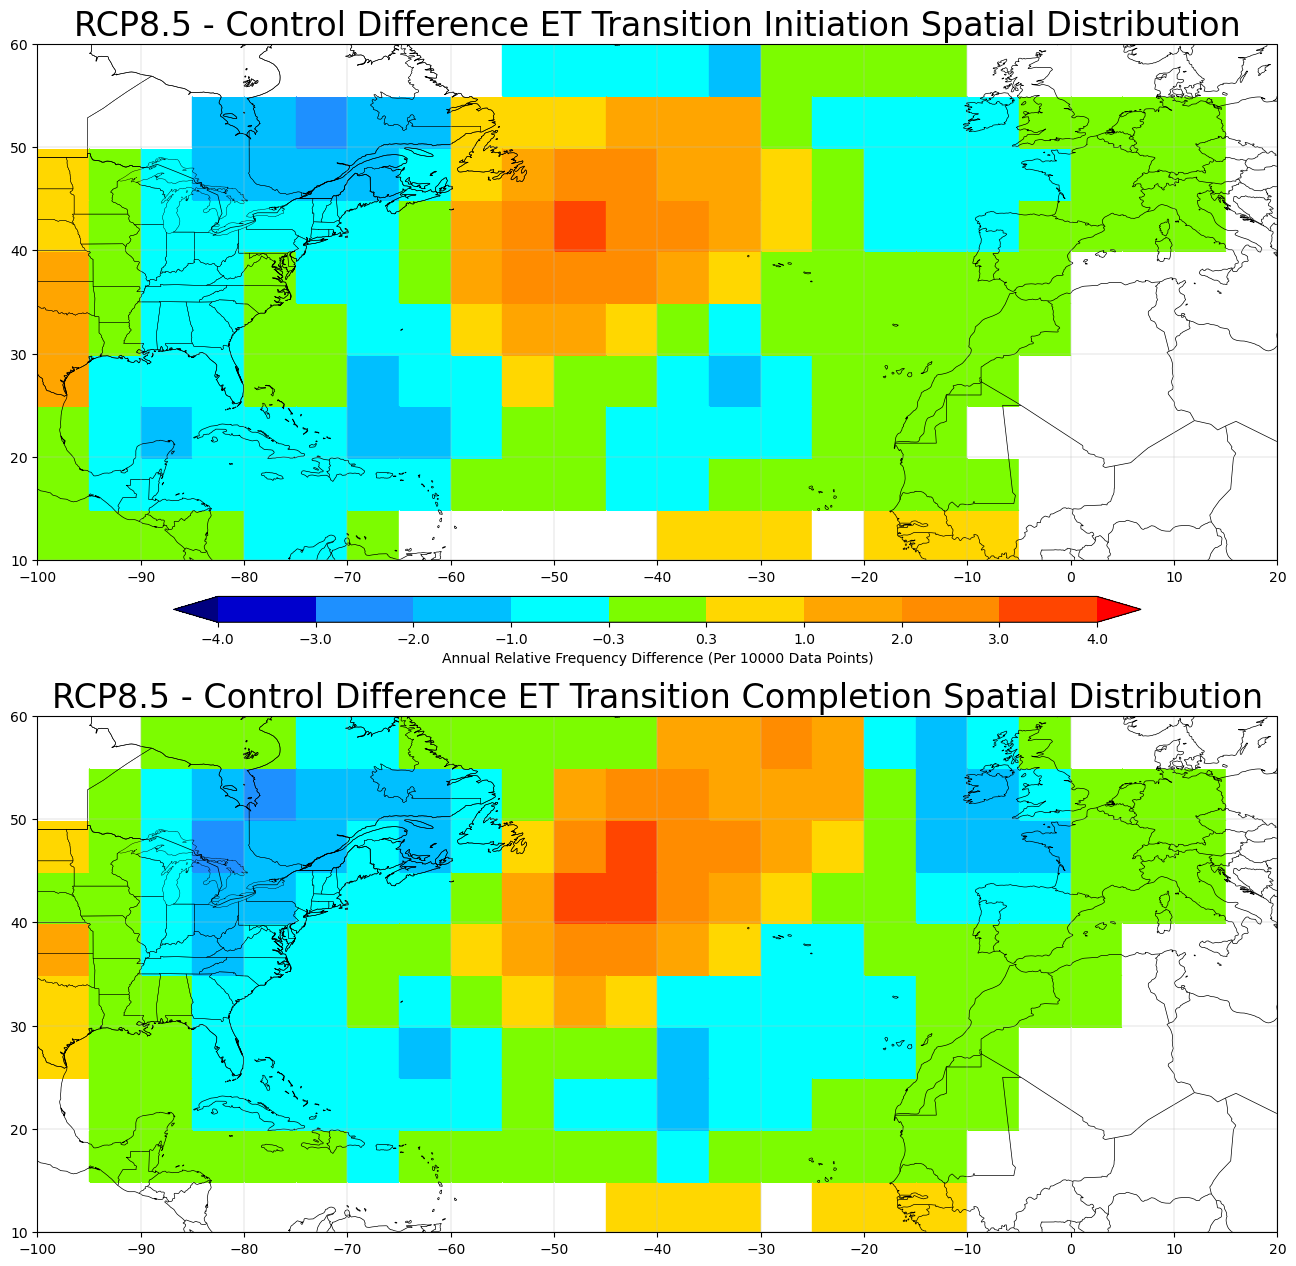

In [64]:
Plot_ET_Dist_Diff(RCP85_ET_Start_Density, Control_ET_Start_Density, RCP85_ET_End_Density, \
Control_ET_End_Density, "RCP8.5", "Control", Spatial_Diff_Bounds, Spatial_Diff_Colours, True, True)

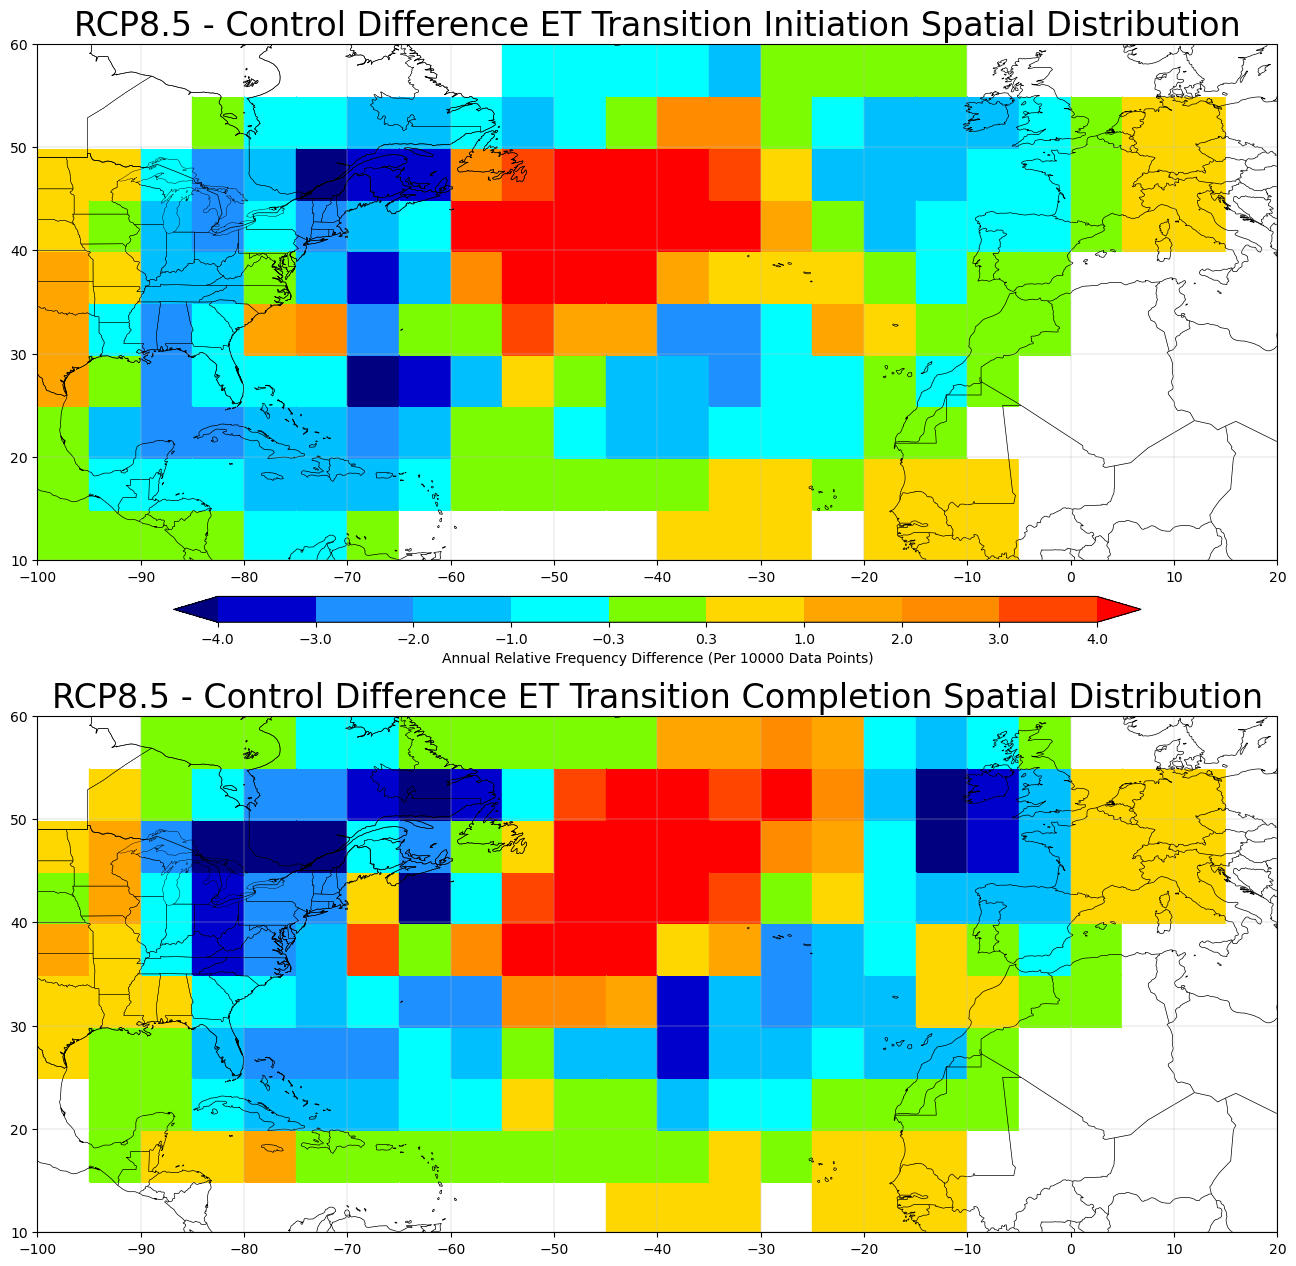

In [65]:
Plot_ET_Dist_Diff(RCP85_ET_Start_Density, Control_ET_Start_Density, RCP85_ET_End_Density, \
Control_ET_End_Density, "RCP8.5", "Control", Spatial_Diff_Bounds, Spatial_Diff_Colours, False, False)

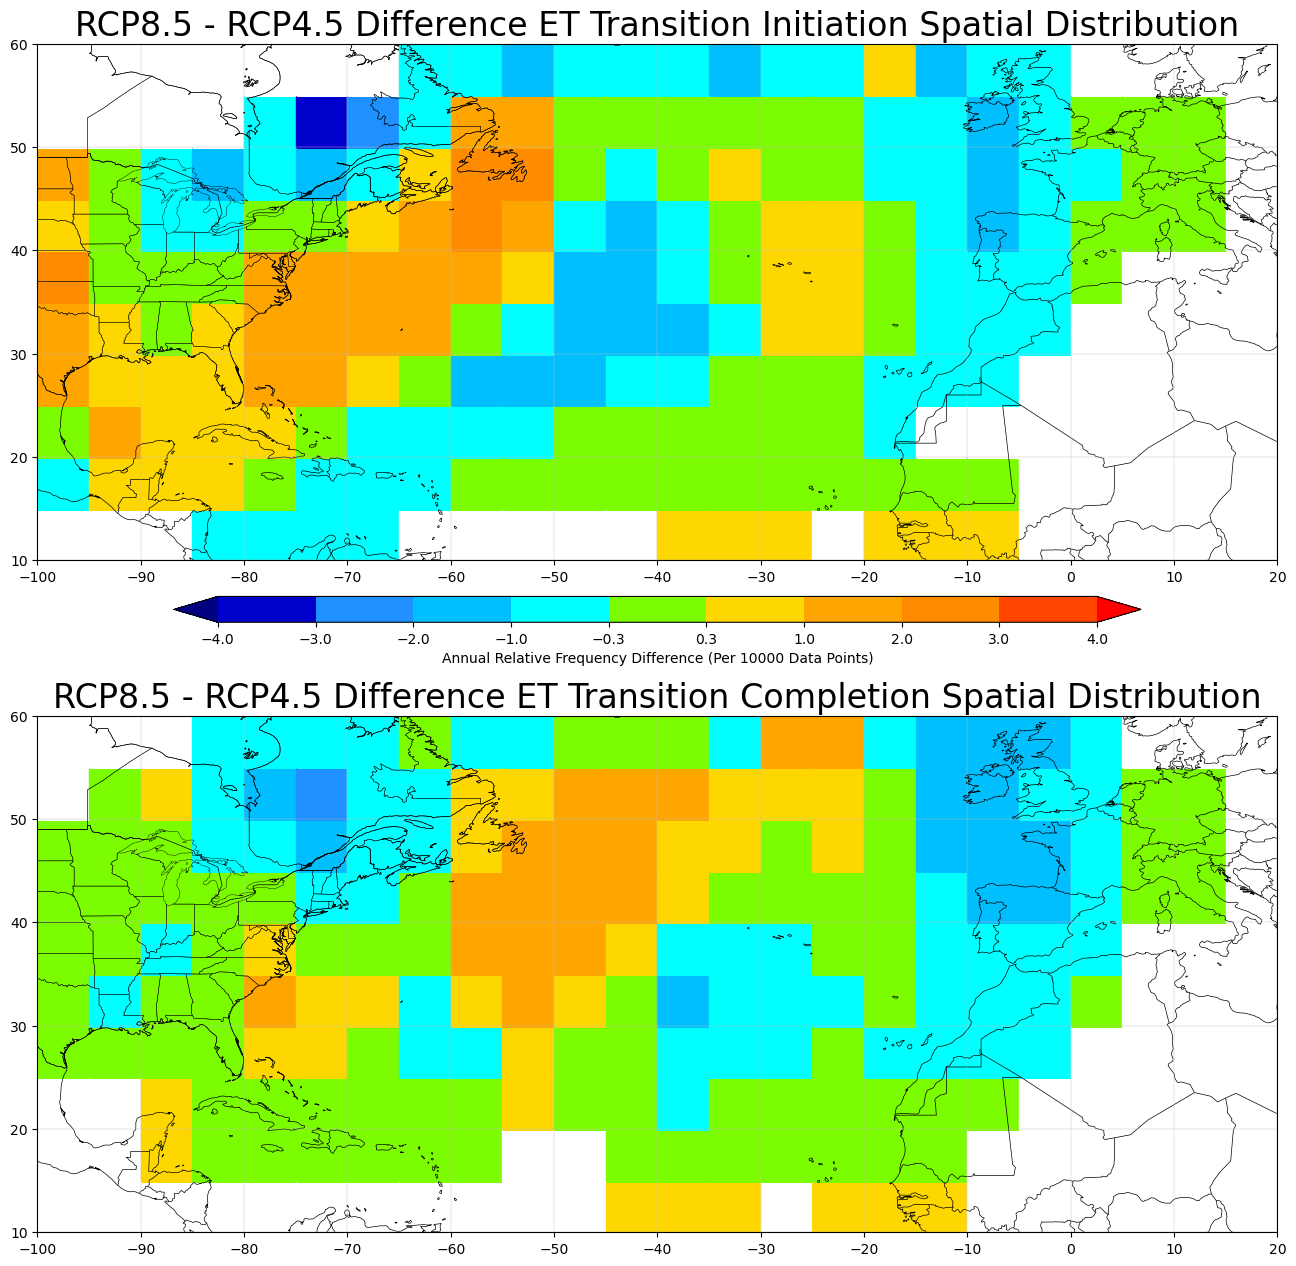

In [66]:
Plot_ET_Dist_Diff(RCP85_ET_Start_Density, RCP45_ET_Start_Density, RCP85_ET_End_Density, \
RCP45_ET_End_Density, "RCP8.5", "RCP4.5", Spatial_Diff_Bounds, Spatial_Diff_Colours, True, True)

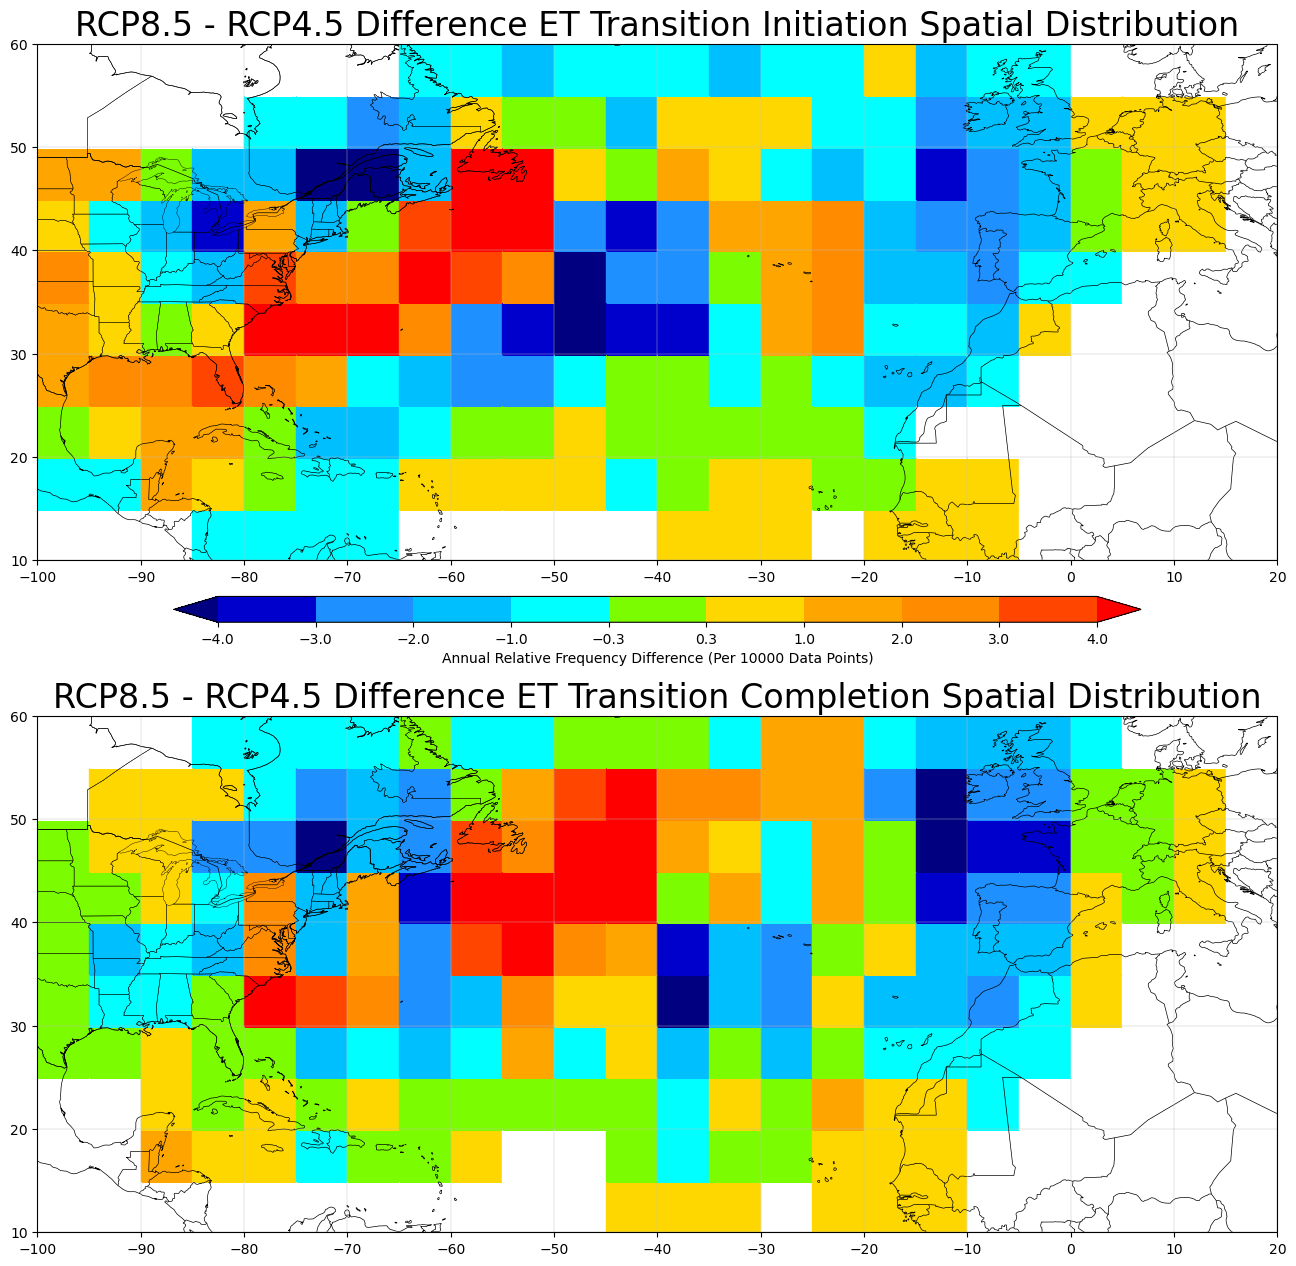

In [67]:
Plot_ET_Dist_Diff(RCP85_ET_Start_Density, RCP45_ET_Start_Density, RCP85_ET_End_Density, \
RCP45_ET_End_Density, "RCP8.5", "RCP4.5", Spatial_Diff_Bounds, Spatial_Diff_Colours, False, False)